# Part 0: Preparing Notebook

In [18]:
!pip install torchinfo

In [19]:
# Checking if a GPU is available for training a model
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1832592348970259645
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14626652160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16159288203858927641
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [20]:
# Display detailed information about the system's memory
!cat /proc/meminfo

MemTotal:       13290460 kB
MemFree:         6144336 kB
MemAvailable:   11575756 kB
Buffers:          432428 kB
Cached:          5141224 kB
SwapCached:            0 kB
Active:           818556 kB
Inactive:        5829996 kB
Active(anon):       1952 kB
Inactive(anon):  1087112 kB
Active(file):     816604 kB
Inactive(file):  4742884 kB
Unevictable:           8 kB
Mlocked:               8 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               508 kB
Writeback:             0 kB
AnonPages:       1075060 kB
Mapped:           806204 kB
Shmem:             13884 kB
KReclaimable:     197336 kB
Slab:             258684 kB
SReclaimable:     197336 kB
SUnreclaim:        61348 kB
KernelStack:        6448 kB
PageTables:        14872 kB
SecPageTables:         0 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6645228 kB
Committed_AS:    3648556 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       83372 kB
VmallocChunk:    

In [21]:
# Display detailed information about the system's central processing unit (CPU)
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0xffffffff
cpu MHz		: 2000.198
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmi

# Part 1: Data Acquisition

In [22]:
!pip install --upgrade --force-reinstall --no-deps kaggle==1.5.8
!mkdir /root/.kaggle

with open("/root/.kaggle/kaggle.json", "w+") as f:
    f.write('{"username":"khushalidaga08","key":"c7aaa2a8acee7e33b56fe4195f198b4d"}')
    # Put your kaggle username & key here

!chmod 600 /root/.kaggle/kaggle.json

  Using cached kaggle-1.5.8-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.8
    Uninstalling kaggle-1.5.8:
      Successfully uninstalled kaggle-1.5.8
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [23]:
!kaggle datasets download behrad3d/nasa-cmaps
! mkdir train
! unzip nasa-cmaps.zip -d train

nasa-cmaps.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘train’: File exists
Archive:  nasa-cmaps.zip
replace train/CMaps/Damage Propagation Modeling.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train/CMaps/RUL_FD001.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train/CMaps/RUL_FD002.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train/CMaps/RUL_FD003.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train/CMaps/RUL_FD004.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: a, n
error:  invalid response [a, n]
replace train/CMaps/RUL_FD004.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: a n
error:  invalid response [a n]
replace train/CMaps/RUL_FD004.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train/CMaps/readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train/CMaps/test_FD001.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train/CMaps/test_FD002.txt? [y]es, [n]o, [A]ll, [N]one, [r

In [24]:
PM_train = '/content/train/CMaps/train_FD001.txt'
PM_test = '/content/train/CMaps/test_FD001.txt'
PM_truth = '/content/train/CMaps/RUL_FD001.txt'

## Binary classification
Predict if an asset will fail within certain time frame (e.g. cycles)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Setting seed for reproducibility
np.random.seed(1234)
PYTHONHASHSEED = 0

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential, load_model
from torchinfo import summary

# define path to save model
model_path = 'binary_model.keras'

### Data Ingestion

In [26]:
# Read training data - Aircraft engine run-to-failure data
train_df = pd.read_csv(PM_train, sep="\s+", header=None, engine='python') # Read the txt file, use appropriate separator and header
train_df.drop([26, 27], axis=1, inplace=True, errors='ignore')  # Explore the data on your own and remove unnecessary columns
train_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3'] + ['sensor' + str(i) for i in range(1, 22)]  # Assign names to all the columns
train_df = train_df.sort_values(['id', 'cycle'])  # Sort by id and cycle

# Read test data - Aircraft engine operating data without failure events recorded
test_df = pd.read_csv(PM_test, sep="\s+", header=None, engine='python')  # Read the txt file, use appropriate separator and header
test_df.drop([26, 27], axis=1, inplace=True, errors='ignore')  # Explore the data on your own and remove unnecessary columns
test_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3'] + ['sensor' + str(i) for i in range(1, 22)]  # Assign names to all the columns
test_df = test_df.sort_values(['id', 'cycle'])

# Read ground truth data - True remaining cycles for each engine in testing data
truth_df = pd.read_csv(PM_truth, sep="\s+", header=None, engine='python') # Read the txt file, use appropriate separator and header
truth_df.dropna(axis=1, inplace=True)  # Explore the data on your own and remove unnecessary columns


### EDA

#### Truth DF

In [27]:
truth_df.head()


,0
0,112
1,98
2,69
3,82
4,91


#### Train DF

In [28]:
train_df.head()

,id,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   setting1  20631 non-null  float64
 3   setting2  20631 non-null  float64
 4   setting3  20631 non-null  float64
 5   sensor1   20631 non-null  float64
 6   sensor2   20631 non-null  float64
 7   sensor3   20631 non-null  float64
 8   sensor4   20631 non-null  float64
 9   sensor5   20631 non-null  float64
 10  sensor6   20631 non-null  float64
 11  sensor7   20631 non-null  float64
 12  sensor8   20631 non-null  float64
 13  sensor9   20631 non-null  float64
 14  sensor10  20631 non-null  float64
 15  sensor11  20631 non-null  float64
 16  sensor12  20631 non-null  float64
 17  sensor13  20631 non-null  float64
 18  sensor14  20631 non-null  float64
 19  sensor15  20631 non-null  float64
 20  sensor16  20631 non-null  fl

In [30]:
train_df.describe()

,id,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [31]:
# Identify columns with constant values
constant_columns = [col for col in train_df.columns if train_df[col].nunique() == 1]

# Print the constant columns identified
print("Constant columns:", constant_columns)

# Drop the constant columns from the DataFrame
train_df_cleaned = train_df.drop(columns=constant_columns)


Constant columns: ['setting3', 'sensor1', 'sensor5', 'sensor10', 'sensor16', 'sensor18', 'sensor19']


#### Test DF

In [32]:
test_df.head()

,id,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [33]:
# Identify columns with constant values
constant_columns = [col for col in test_df.columns if test_df[col].nunique() == 1]

# Print the constant columns identified
print("Constant columns:", constant_columns)

# Drop the constant columns from the DataFrame
test_df_cleaned = test_df.drop(columns=constant_columns)

Constant columns: ['setting3', 'sensor1', 'sensor5', 'sensor10', 'sensor16', 'sensor18', 'sensor19']


### Data Cleaning After EDA

In [34]:
train_df = train_df_cleaned
test_df = test_df_cleaned


### Additional EDA

In [35]:
# Group by 'id' and find the maximum cycle per engine
max_cycle_per_engine = train_df.groupby('id')['cycle'].max().reset_index()

# Rename the columns for clarity
max_cycle_per_engine.columns = ['id', 'max_cycle']

# Display the result
print(max_cycle_per_engine)


     id  max_cycle
0     1        192
1     2        287
2     3        179
3     4        189
4     5        269
..  ...        ...
95   96        336
96   97        202
97   98        156
98   99        185
99  100        200

[100 rows x 2 columns]


In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   setting1  20631 non-null  float64
 3   setting2  20631 non-null  float64
 4   sensor2   20631 non-null  float64
 5   sensor3   20631 non-null  float64
 6   sensor4   20631 non-null  float64
 7   sensor6   20631 non-null  float64
 8   sensor7   20631 non-null  float64
 9   sensor8   20631 non-null  float64
 10  sensor9   20631 non-null  float64
 11  sensor11  20631 non-null  float64
 12  sensor12  20631 non-null  float64
 13  sensor13  20631 non-null  float64
 14  sensor14  20631 non-null  float64
 15  sensor15  20631 non-null  float64
 16  sensor17  20631 non-null  int64  
 17  sensor20  20631 non-null  float64
 18  sensor21  20631 non-null  float64
dtypes: float64(16), int64(3)
memory usage: 3.0 MB


In [37]:
train_df['sensor17'] = train_df['sensor17'].astype(float)

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   setting1  20631 non-null  float64
 3   setting2  20631 non-null  float64
 4   sensor2   20631 non-null  float64
 5   sensor3   20631 non-null  float64
 6   sensor4   20631 non-null  float64
 7   sensor6   20631 non-null  float64
 8   sensor7   20631 non-null  float64
 9   sensor8   20631 non-null  float64
 10  sensor9   20631 non-null  float64
 11  sensor11  20631 non-null  float64
 12  sensor12  20631 non-null  float64
 13  sensor13  20631 non-null  float64
 14  sensor14  20631 non-null  float64
 15  sensor15  20631 non-null  float64
 16  sensor17  20631 non-null  float64
 17  sensor20  20631 non-null  float64
 18  sensor21  20631 non-null  float64
dtypes: float64(17), int64(2)
memory usage: 3.0 MB


In [39]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        13096 non-null  int64  
 1   cycle     13096 non-null  int64  
 2   setting1  13096 non-null  float64
 3   setting2  13096 non-null  float64
 4   sensor2   13096 non-null  float64
 5   sensor3   13096 non-null  float64
 6   sensor4   13096 non-null  float64
 7   sensor6   13096 non-null  float64
 8   sensor7   13096 non-null  float64
 9   sensor8   13096 non-null  float64
 10  sensor9   13096 non-null  float64
 11  sensor11  13096 non-null  float64
 12  sensor12  13096 non-null  float64
 13  sensor13  13096 non-null  float64
 14  sensor14  13096 non-null  float64
 15  sensor15  13096 non-null  float64
 16  sensor17  13096 non-null  int64  
 17  sensor20  13096 non-null  float64
 18  sensor21  13096 non-null  float64
dtypes: float64(16), int64(3)
memory usage: 1.9 MB


In [40]:
test_df['sensor17'] = test_df['sensor17'].astype(float)

In [41]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        13096 non-null  int64  
 1   cycle     13096 non-null  int64  
 2   setting1  13096 non-null  float64
 3   setting2  13096 non-null  float64
 4   sensor2   13096 non-null  float64
 5   sensor3   13096 non-null  float64
 6   sensor4   13096 non-null  float64
 7   sensor6   13096 non-null  float64
 8   sensor7   13096 non-null  float64
 9   sensor8   13096 non-null  float64
 10  sensor9   13096 non-null  float64
 11  sensor11  13096 non-null  float64
 12  sensor12  13096 non-null  float64
 13  sensor13  13096 non-null  float64
 14  sensor14  13096 non-null  float64
 15  sensor15  13096 non-null  float64
 16  sensor17  13096 non-null  float64
 17  sensor20  13096 non-null  float64
 18  sensor21  13096 non-null  float64
dtypes: float64(17), int64(2)
memory usage: 1.9 MB


# Part 1: Data Preprocessing

## Feature Engineering

In [42]:
# Define aggregation functions you want to apply
aggregation_functions = ['mean', 'max', 'min', 'std']

# Apply the aggregation functions for sensor columns
# Aggregation per engine ('id') for train data
aggregated_train_df = train_df.groupby('id').agg({col: aggregation_functions for col in train_df.filter(like='sensor').columns})
aggregated_train_df.columns = ['_'.join(col).strip() for col in aggregated_train_df.columns.values]

# Merge aggregated features back to the original train dataframe
train_df = train_df.merge(aggregated_train_df, on='id', how='left')

# Aggregation per engine ('id') for test data
aggregated_test_df = test_df.groupby('id').agg({col: aggregation_functions for col in test_df.filter(like='sensor').columns})
aggregated_test_df.columns = ['_'.join(col).strip() for col in aggregated_test_df.columns.values]

# Merge aggregated features back to the original test dataframe
test_df = test_df.merge(aggregated_test_df, on='id', how='left')


In [43]:
# Define the number of lags you want to create
lag = 3  # Adjust based on your needs

# Create a list to store lagged DataFrames
lagged_features = []

# Generate lag features for each sensor column in train_df
for col in train_df.filter(like='sensor').columns:
    # Create lagged columns for the current sensor and append to the list
    for i in range(1, lag + 1):
        lagged_df = train_df[[col]].shift(i).rename(columns={col: f'{col}_lag_{i}'})
        lagged_features.append(lagged_df)

# Concatenate all lagged features along columns
lagged_train_df = pd.concat(lagged_features, axis=1)

# Merge lagged features back to the original train_df
train_df = pd.concat([train_df, lagged_train_df], axis=1)

# Fill missing values caused by lagging
train_df.fillna(0, inplace=True)

# Repeat the same process for test_df
lagged_features_test = []
for col in test_df.filter(like='sensor').columns:
    for i in range(1, lag + 1):
        lagged_df = test_df[[col]].shift(i).rename(columns={col: f'{col}_lag_{i}'})
        lagged_features_test.append(lagged_df)

# Concatenate all lagged features for test data
lagged_test_df = pd.concat(lagged_features_test, axis=1)

# Merge lagged features back to the original test_df
test_df = pd.concat([test_df, lagged_test_df], axis=1)

# Fill missing values caused by lagging in test data
test_df.fillna(0, inplace=True)


In [44]:
train_df.shape


(20631, 304)

In [45]:
test_df.shape


(13096, 304)

In [46]:
train_df.head()

,id,cycle,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,...,sensor21_mean_lag_3,sensor21_max_lag_1,sensor21_max_lag_2,sensor21_max_lag_3,sensor21_min_lag_1,sensor21_min_lag_2,sensor21_min_lag_3,sensor21_std_lag_1,sensor21_std_lag_2,sensor21_std_lag_3
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,...,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,...,0.00000,23.4999,0.0000,0.0000,22.9588,0.0000,0.0000,0.105101,0.000000,0.000000
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,...,0.00000,23.4999,23.4999,0.0000,22.9588,22.9588,0.0000,0.105101,0.105101,0.000000
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,...,23.30631,23.4999,23.4999,23.4999,22.9588,22.9588,22.9588,0.105101,0.105101,0.105101
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,...,23.30631,23.4999,23.4999,23.4999,22.9588,22.9588,22.9588,0.105101,0.105101,0.105101


In [47]:
duplicated_cols = train_df.T.duplicated()
print("Duplicated Columns:", train_df.columns[duplicated_cols].tolist())

Duplicated Columns: []


In [48]:
duplicated_cols = test_df.T.duplicated()
print("Duplicated Columns:", test_df.columns[duplicated_cols].tolist())

Duplicated Columns: []


In [49]:
train_df_v2 = train_df
test_df_v2 = test_df

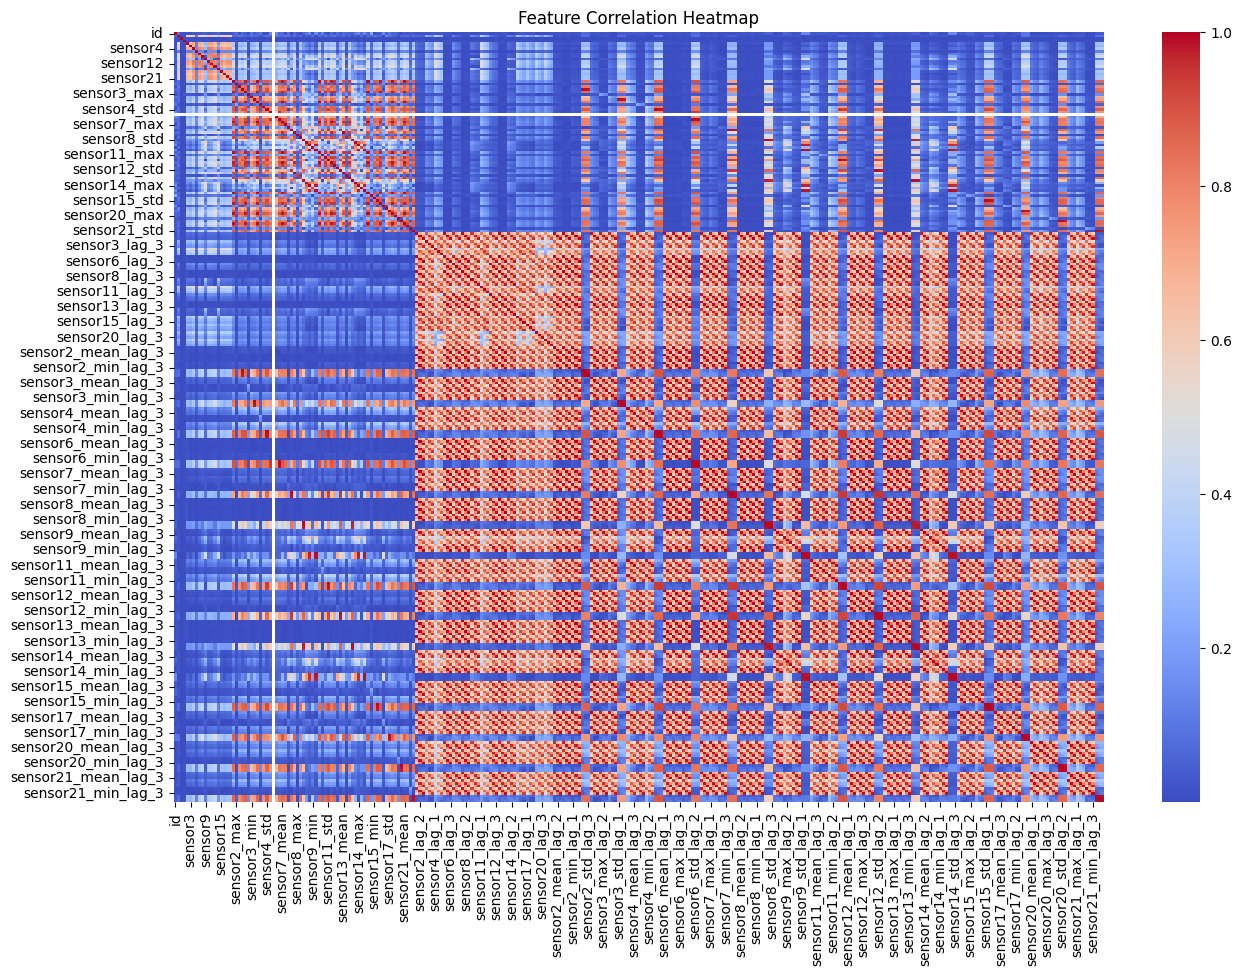

Highly Correlated Feature Pairs: sensor8_mean_lag_3   sensor13_mean_lag_3    1.000000
sensor13_mean_lag_3  sensor8_mean_lag_3     1.000000
sensor13_mean_lag_2  sensor8_mean_lag_2     1.000000
sensor8_mean_lag_2   sensor13_mean_lag_2    1.000000
sensor13_mean_lag_1  sensor8_mean_lag_1     1.000000
                                              ...   
sensor2_mean         sensor21_max           0.900158
sensor4_std_lag_1    sensor3_mean           0.900130
sensor3_mean         sensor4_std_lag_1      0.900130
sensor21_std_lag_1   sensor11_std_lag_1     0.900096
sensor11_std_lag_1   sensor21_std_lag_1     0.900096
Length: 9390, dtype: float64


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = train_df.corr().abs()

# Plot the heatmap to visually inspect correlations
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

# Find highly correlated features (correlation > 0.9)
high_corr_pairs = corr_matrix.unstack().sort_values(kind="quicksort", ascending=False)
high_corr_pairs = high_corr_pairs[(high_corr_pairs > 0.9) & (high_corr_pairs < 1.0)]
print("Highly Correlated Feature Pairs:", high_corr_pairs)


In [51]:
import pandas as pd
import numpy as np

# Calculate the correlation matrix
corr_matrix = train_df.corr()

# Create an upper triangle matrix of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify pairs with correlation close to 1 (accounting for floating-point precision)
to_drop = [column for column in upper.columns if any(np.isclose(upper[column], 1))]

# Drop these columns from both train and test datasets
train_df = train_df.drop(columns=to_drop)
test_df = test_df.drop(columns=to_drop)

print(f"Dropped columns: {to_drop}")


Dropped columns: ['sensor13_lag_1', 'sensor13_lag_2', 'sensor13_lag_3', 'sensor6_mean_lag_1', 'sensor6_mean_lag_2', 'sensor6_mean_lag_3', 'sensor6_max_lag_1', 'sensor6_max_lag_2', 'sensor6_max_lag_3', 'sensor8_mean_lag_1', 'sensor8_mean_lag_2', 'sensor8_mean_lag_3', 'sensor8_max_lag_1', 'sensor8_max_lag_2', 'sensor8_max_lag_3', 'sensor8_min_lag_1', 'sensor8_min_lag_2', 'sensor8_min_lag_3', 'sensor13_mean_lag_1', 'sensor13_mean_lag_2', 'sensor13_mean_lag_3', 'sensor13_max_lag_1', 'sensor13_max_lag_2', 'sensor13_max_lag_3', 'sensor13_min_lag_1', 'sensor13_min_lag_2', 'sensor13_min_lag_3']


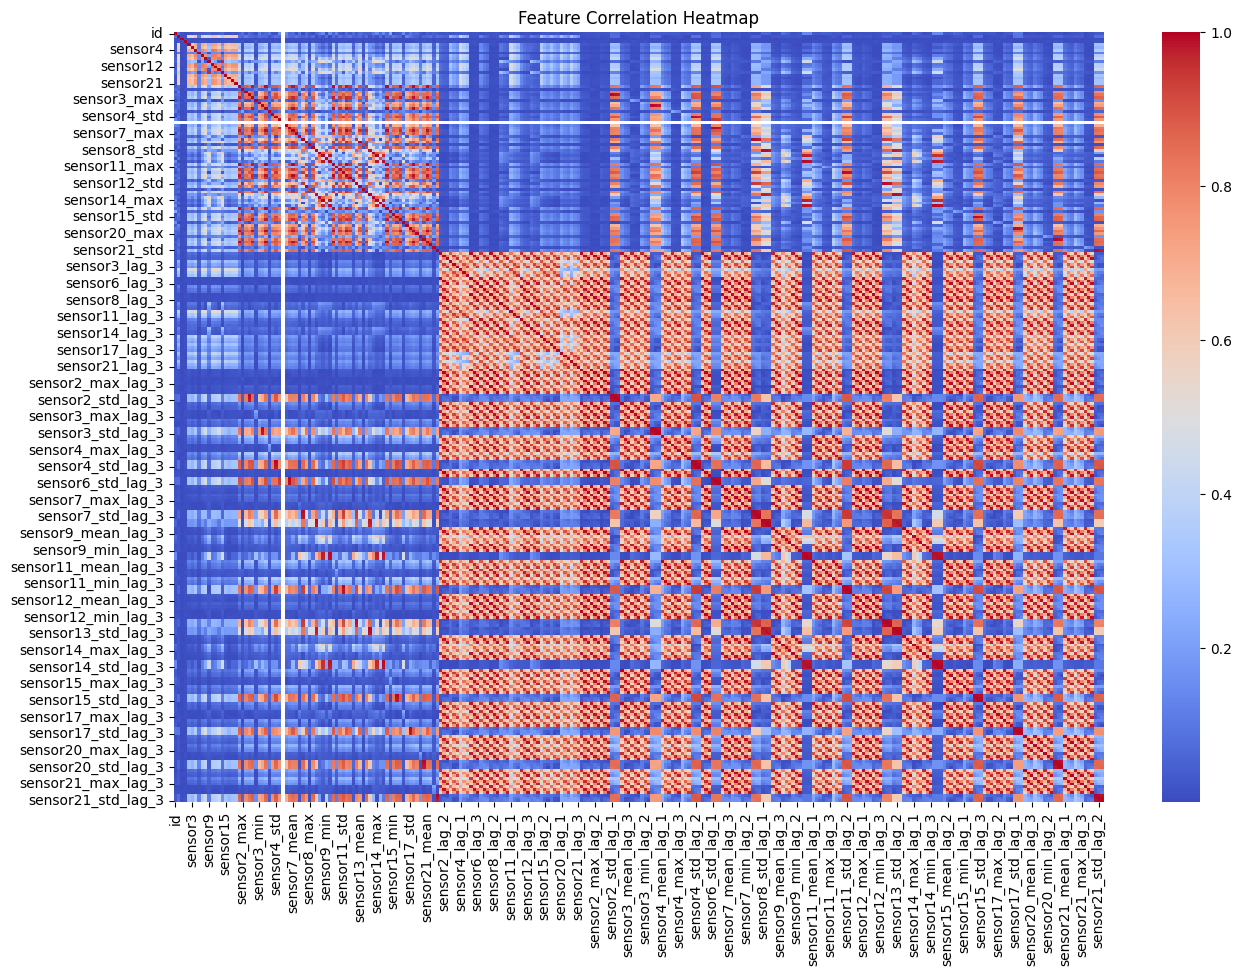

Highly Correlated Feature Pairs: sensor8_lag_3        sensor6_lag_3         0.999985
sensor6_lag_3        sensor8_lag_3         0.999985
sensor6_lag_2        sensor8_lag_2         0.999977
sensor8_lag_2        sensor6_lag_2         0.999977
sensor12_mean_lag_3  sensor7_mean_lag_3    0.999974
                                             ...   
sensor21_max         sensor2_mean          0.900158
sensor3_mean         sensor4_std_lag_1     0.900130
sensor4_std_lag_1    sensor3_mean          0.900130
sensor11_std_lag_1   sensor21_std_lag_1    0.900096
sensor21_std_lag_1   sensor11_std_lag_1    0.900096
Length: 6672, dtype: float64


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = train_df.corr().abs()

# Plot the heatmap to visually inspect correlations
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

# Find highly correlated features (correlation > 0.9)
high_corr_pairs = corr_matrix.unstack().sort_values(kind="quicksort", ascending=False)
high_corr_pairs = high_corr_pairs[(high_corr_pairs > 0.9) & (high_corr_pairs < 1.0)]
print("Highly Correlated Feature Pairs:", high_corr_pairs)


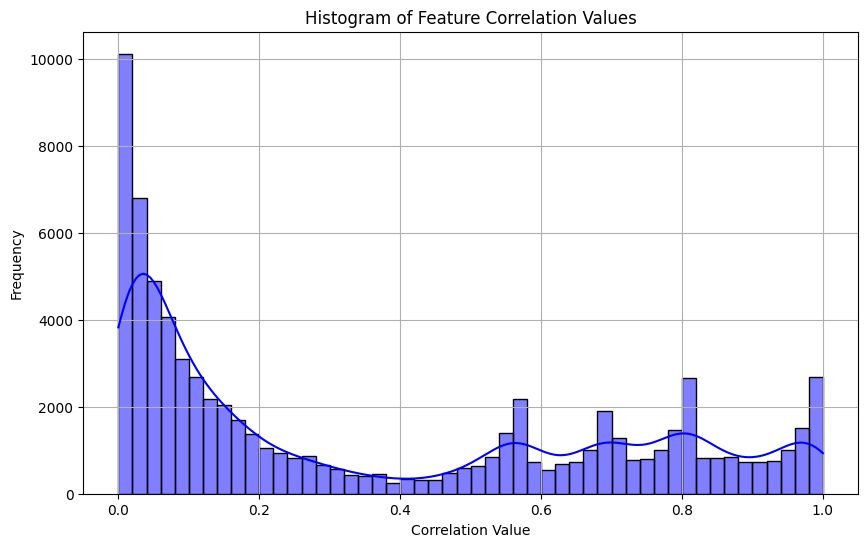

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the correlation matrix and filter out self-correlations
corr_values = corr_matrix.abs().unstack()
corr_values = corr_values[corr_values != 1]  # Exclude perfect self-correlations

# Plotting histogram of correlation values
plt.figure(figsize=(10, 6))
sns.histplot(corr_values, bins=50, kde=True, color='blue')
plt.title('Histogram of Feature Correlation Values')
plt.xlabel('Correlation Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [54]:
train_df.shape


(20631, 277)

In [55]:
test_df.shape

(13096, 277)

In [56]:
import pandas as pd
import numpy as np

# Calculate the correlation matrix
corr_matrix = train_df.corr()

# Create an upper triangle matrix of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Set the threshold for dropping columns based on correlation
threshold = 0.95

# Identify columns to drop based on the chosen threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Ensure columns to drop are present in the DataFrame before attempting to drop
to_drop_train = [col for col in to_drop if col in train_df.columns]
to_drop_test = [col for col in to_drop if col in test_df.columns]

# Drop the identified columns from both train and test datasets
train_df = train_df.drop(columns=to_drop_train)
test_df = test_df.drop(columns=to_drop_test)

print(f"Dropped columns from train_df: {to_drop_train}")
print(f"Dropped columns from test_df: {to_drop_test}")

Dropped columns from train_df: ['sensor14', 'sensor3_mean', 'sensor4_mean', 'sensor9_std', 'sensor11_mean', 'sensor11_min', 'sensor12_mean', 'sensor12_std', 'sensor13_mean', 'sensor13_std', 'sensor14_mean', 'sensor14_max', 'sensor14_std', 'sensor15_mean', 'sensor17_mean', 'sensor20_mean', 'sensor21_mean', 'sensor3_lag_3', 'sensor6_lag_1', 'sensor6_lag_2', 'sensor6_lag_3', 'sensor7_lag_1', 'sensor7_lag_2', 'sensor7_lag_3', 'sensor8_lag_1', 'sensor8_lag_2', 'sensor8_lag_3', 'sensor9_lag_2', 'sensor9_lag_3', 'sensor11_lag_2', 'sensor11_lag_3', 'sensor12_lag_1', 'sensor12_lag_2', 'sensor12_lag_3', 'sensor14_lag_1', 'sensor14_lag_2', 'sensor14_lag_3', 'sensor15_lag_2', 'sensor15_lag_3', 'sensor17_lag_3', 'sensor20_lag_3', 'sensor21_lag_3', 'sensor2_mean_lag_1', 'sensor2_mean_lag_2', 'sensor2_mean_lag_3', 'sensor2_max_lag_1', 'sensor2_max_lag_2', 'sensor2_max_lag_3', 'sensor2_min_lag_1', 'sensor2_min_lag_2', 'sensor2_min_lag_3', 'sensor2_std_lag_1', 'sensor2_std_lag_2', 'sensor2_std_lag_3', 

In [57]:
train_df.shape


(20631, 82)

In [58]:
test_df.shape

(13096, 82)

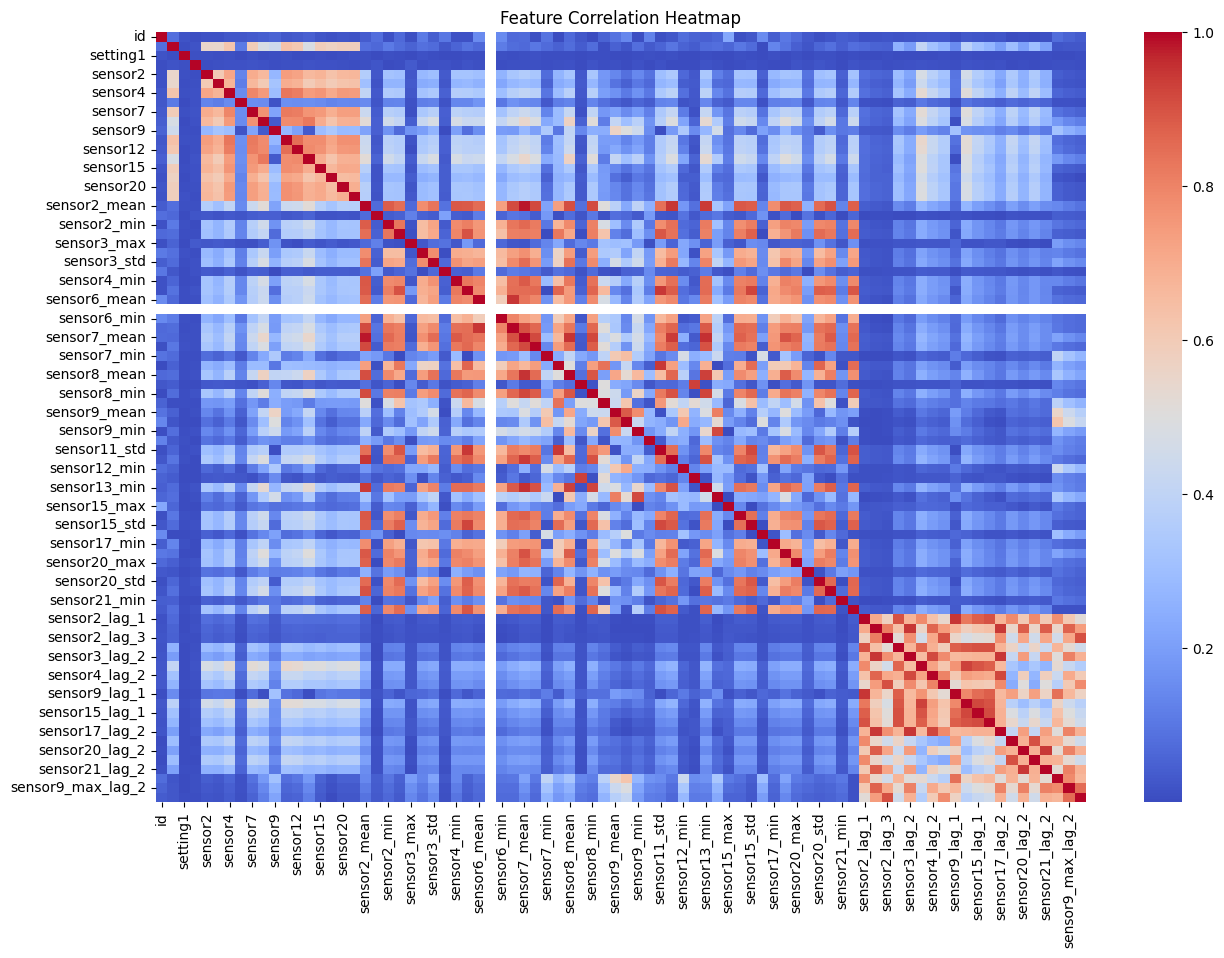

Highly Correlated Feature Pairs: sensor7_mean    sensor2_mean      0.984258
sensor2_mean    sensor7_mean      0.984258
sensor13_min    sensor7_mean      0.955524
sensor7_mean    sensor13_min      0.955524
sensor8_mean    sensor7_mean      0.951733
                                    ...   
sensor17_std    sensor7_mean      0.900843
sensor11_lag_1  sensor17_lag_1    0.900695
sensor17_lag_1  sensor11_lag_1    0.900695
sensor21_max    sensor2_mean      0.900158
sensor2_mean    sensor21_max      0.900158
Length: 90, dtype: float64


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = train_df.corr().abs()

# Plot the heatmap to visually inspect correlations
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

# Find highly correlated features (correlation > 0.9)
high_corr_pairs = corr_matrix.unstack().sort_values(kind="quicksort", ascending=False)
high_corr_pairs = high_corr_pairs[(high_corr_pairs > 0.9) & (high_corr_pairs < 1.0)]
print("Highly Correlated Feature Pairs:", high_corr_pairs)


## Data Preprocessing

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
#######
# TRAIN
#######
# Data Labeling - generate column RUL (Remaining Useful Life or Time to Failure)

# TODO: Calculate the maximum cycle value for each engine (id) and store it in a new DataFrame (rul)
rul = train_df.groupby('id')['cycle'].max().reset_index()
# TODO: Rename the columns in the rul DataFrame
rul.columns = ['id', 'max_cycle']
# TODO: Merge the rul DataFrame with the original train_df based on the 'id' column
train_df = train_df.merge(rul, on='id', how='left')
# TODO: Calculate the Remaining Useful Life (RUL) by subtracting the current cycle from the maximum cycle
train_df['RUL'] = train_df['max_cycle'] - train_df['cycle']
# TODO: Remove the temporary column used to calculate RUL
train_df.drop('max_cycle', axis=1, inplace=True)

# Generate label columns for training data
# We will only make use of "label1" for binary classification,
# while trying to answer the question: is a specific engine going to fail within w1 cycles?
w1 = 30
w0 = 15

# TODO: Create a binary label ('label1') indicating if the engine will fail within w1 cycles (1) or not (0)
train_df['label1'] = (train_df['RUL'] <= w1).astype(int)  # Replace with the correct threshold value and label values
# TODO: Initialize a second label ('label2') as a copy of 'label1'
train_df['label2'] = train_df['label1'].copy()
# TODO: Update 'label2' to indicate if the engine will fail within w0 cycles (2) or not (0/1)
train_df.loc[train_df['RUL'] <= w0, 'label2'] = 2 # Replace with the correct threshold value and label value


# MinMax normalization (from 0 to 1)
# TODO: Create a normalized version of the 'cycle' column (e.g., 'cycle_norm') using the original 'cycle' values
train_df['cycle_norm'] = train_df['cycle'] / train_df['cycle'].max()  # Replace with the correct normalization code
# TODO: Select the columns to be normalized (all columns except 'id', 'cycle', 'RUL', 'label1', and 'label2')
cols_normalize = train_df.columns.difference(['id', 'cycle', 'RUL', 'label1', 'label2'])  # Replace with the correct column selection code
# TODO: Initialize a MinMaxScaler object to scale values between 0 and 1
min_max_scaler = MinMaxScaler()  # Replace with the correct scaler initialization code
# TODO: Apply MinMaxScaler to the selected columns and create a new normalized DataFrame
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_df[cols_normalize]),
                             columns=cols_normalize,
                             index=train_df.index)  # Replace with the correct normalization code
# TODO: Join the normalized DataFrame with the original DataFrame (excluding normalized columns)
join_df = train_df[['id', 'cycle', 'RUL', 'label1', 'label2']].join(norm_train_df)  # Replace with the correct join code
# TODO: Reorder the columns in the joined DataFrame to match the original order
train_df = join_df.reindex(columns=train_df.columns)  # Replace with the correct reindexing code

print(f"Final Train DataFrame Shape: {train_df.shape}")
print(train_df.head())


Final Train DataFrame Shape: (20631, 86)
   id  cycle  setting1  setting2   sensor2   sensor3   sensor4  sensor6  \
0   1      1  0.459770  0.166667  0.183735  0.406802  0.309757      1.0   
1   1      2  0.609195  0.250000  0.283133  0.453019  0.352633      1.0   
2   1      3  0.252874  0.750000  0.343373  0.369523  0.370527      1.0   
3   1      4  0.540230  0.500000  0.343373  0.256159  0.331195      1.0   
4   1      5  0.390805  0.333333  0.349398  0.257467  0.404625      1.0   

    sensor7   sensor8  ...  sensor20_lag_2  sensor21_lag_1  sensor21_lag_2  \
0  0.726248  0.242424  ...        0.000000        0.000000        0.000000   
1  0.628019  0.212121  ...        0.000000        0.991557        0.000000   
2  0.710145  0.272727  ...        0.990616        0.991752        0.991557   
3  0.740741  0.318182  ...        0.989095        0.988390        0.991752   
4  0.668277  0.242424  ...        0.987827        0.989648        0.988390   

   sensor9_max_lag_1  sensor9_max_lag_2

In [62]:
test_df_v3 = test_df

In [63]:
######
# TEST
######
# MinMax normalization (from 0 to 1)
# TODO: Similar to the MinMax normalization done for Train, complete the code below.
test_df['cycle_norm'] = test_df['cycle'] / test_df['cycle'].max()
cols_normalize = test_df.columns.difference(['id', 'cycle', 'RUL', 'label1', 'label2'])
norm_test_df = pd.DataFrame(min_max_scaler.transform(test_df[cols_normalize]),
                            columns=cols_normalize,
                            index=test_df.index)
test_join_df = test_df[['id', 'cycle']].join(norm_test_df)
test_df = test_join_df.reindex(columns=test_df.columns)

In [64]:
# We use the ground truth dataset to generate labels for the test data.
# generate column max for test data
# TODO: Calculate the maximum cycle value for each engine (id) in the test data and store it in a new DataFrame (rul)
rul = test_df.groupby('id')['cycle'].max().reset_index()
# TODO: Rename the columns in the rul DataFrame
rul.columns = ['id', 'max_cycle']
# TODO: Merge the rul DataFrame with the original test_df based on the 'id' column
truth_df.columns = ['more']
truth_df['id'] = truth_df.index + 1
truth_df['max'] = rul['max_cycle'] + truth_df['more']
truth_df.head()


,more,id,max
0,112,1,143
1,98,2,147
2,69,3,195
3,82,4,188
4,91,5,189


In [65]:
rul.head()

,id,max_cycle
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98


In [66]:
# TODO: Remove the temporary column used to calculate RUL
# truth_df.drop(NotImplemented, axis=1, inplace=True)

# TODO: Merge the adjusted truth_df with the test_df to generate RUL values for test data
test_df = test_df.merge(truth_df[['id', 'max']], on='id', how='left')
# TODO: Calculate the Remaining Useful Life (RUL) by subtracting the current cycle from the maximum cycle
test_df['RUL'] = test_df['max'] - test_df['cycle']
# TODO: Remove the temporary column used to calculate RUL
test_df.drop('max', axis=1, inplace=True)

In [67]:
test_df.columns

Index(['id', 'cycle', 'setting1', 'setting2', 'sensor2', 'sensor3', 'sensor4',
       'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12',
       'sensor13', 'sensor15', 'sensor17', 'sensor20', 'sensor21',
       'sensor2_mean', 'sensor2_max', 'sensor2_min', 'sensor2_std',
       'sensor3_max', 'sensor3_min', 'sensor3_std', 'sensor4_max',
       'sensor4_min', 'sensor4_std', 'sensor6_mean', 'sensor6_max',
       'sensor6_min', 'sensor6_std', 'sensor7_mean', 'sensor7_max',
       'sensor7_min', 'sensor7_std', 'sensor8_mean', 'sensor8_max',
       'sensor8_min', 'sensor8_std', 'sensor9_mean', 'sensor9_max',
       'sensor9_min', 'sensor11_max', 'sensor11_std', 'sensor12_max',
       'sensor12_min', 'sensor13_max', 'sensor13_min', 'sensor14_min',
       'sensor15_max', 'sensor15_min', 'sensor15_std', 'sensor17_max',
       'sensor17_min', 'sensor17_std', 'sensor20_max', 'sensor20_min',
       'sensor20_std', 'sensor21_max', 'sensor21_min', 'sensor21_std',
       'sensor2_la

In [68]:
train_df.columns

Index(['id', 'cycle', 'setting1', 'setting2', 'sensor2', 'sensor3', 'sensor4',
       'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12',
       'sensor13', 'sensor15', 'sensor17', 'sensor20', 'sensor21',
       'sensor2_mean', 'sensor2_max', 'sensor2_min', 'sensor2_std',
       'sensor3_max', 'sensor3_min', 'sensor3_std', 'sensor4_max',
       'sensor4_min', 'sensor4_std', 'sensor6_mean', 'sensor6_max',
       'sensor6_min', 'sensor6_std', 'sensor7_mean', 'sensor7_max',
       'sensor7_min', 'sensor7_std', 'sensor8_mean', 'sensor8_max',
       'sensor8_min', 'sensor8_std', 'sensor9_mean', 'sensor9_max',
       'sensor9_min', 'sensor11_max', 'sensor11_std', 'sensor12_max',
       'sensor12_min', 'sensor13_max', 'sensor13_min', 'sensor14_min',
       'sensor15_max', 'sensor15_min', 'sensor15_std', 'sensor17_max',
       'sensor17_min', 'sensor17_std', 'sensor20_max', 'sensor20_min',
       'sensor20_std', 'sensor21_max', 'sensor21_min', 'sensor21_std',
       'sensor2_la

In [69]:
# Generate binary label columns (label1 and label2) based on RUL values and thresholds w0 and w1
# TODO: Similar to what you did in the train dataframe
test_df['label1'] = (test_df['RUL'] <= w1).astype(int)
test_df['label2'] = test_df['label1'].copy()
test_df.loc[test_df['RUL'] <= w0, 'label2'] = 2

In [70]:
truth_df.head()

,more,id,max
0,112,1,143
1,98,2,147
2,69,3,195
3,82,4,188
4,91,5,189


In [71]:
test_df.shape

(13096, 86)

In [72]:
train_df.shape

(20631, 86)

In [73]:
test_df.head()

,id,cycle,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,...,sensor20_lag_2,sensor21_lag_1,sensor21_lag_2,sensor9_max_lag_1,sensor9_max_lag_2,sensor9_max_lag_3,cycle_norm,RUL,label1,label2
0,1,1,0.632184,0.750000,0.545181,0.310661,0.269413,1.0,0.652174,0.212121,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000539,142,0,0
1,1,2,0.344828,0.250000,0.150602,0.379551,0.222316,1.0,0.805153,0.166667,...,0.000000,0.989631,0.000000,0.979704,0.000000,0.000000,0.003849,141,0,0
2,1,3,0.517241,0.583333,0.376506,0.346632,0.322248,1.0,0.685990,0.227273,...,0.985544,0.990397,0.989631,0.979704,0.979704,0.000000,0.007158,140,0,0
3,1,4,0.741379,0.500000,0.370482,0.285154,0.408001,1.0,0.679549,0.196970,...,0.989602,0.991456,0.990397,0.979704,0.979704,0.979704,0.010468,139,0,0
4,1,5,0.580460,0.500000,0.391566,0.352082,0.332039,1.0,0.694042,0.166667,...,0.991124,0.989639,0.991456,0.979704,0.979704,0.979704,0.013777,138,0,0


In [74]:
test_df.columns

Index(['id', 'cycle', 'setting1', 'setting2', 'sensor2', 'sensor3', 'sensor4',
       'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12',
       'sensor13', 'sensor15', 'sensor17', 'sensor20', 'sensor21',
       'sensor2_mean', 'sensor2_max', 'sensor2_min', 'sensor2_std',
       'sensor3_max', 'sensor3_min', 'sensor3_std', 'sensor4_max',
       'sensor4_min', 'sensor4_std', 'sensor6_mean', 'sensor6_max',
       'sensor6_min', 'sensor6_std', 'sensor7_mean', 'sensor7_max',
       'sensor7_min', 'sensor7_std', 'sensor8_mean', 'sensor8_max',
       'sensor8_min', 'sensor8_std', 'sensor9_mean', 'sensor9_max',
       'sensor9_min', 'sensor11_max', 'sensor11_std', 'sensor12_max',
       'sensor12_min', 'sensor13_max', 'sensor13_min', 'sensor14_min',
       'sensor15_max', 'sensor15_min', 'sensor15_std', 'sensor17_max',
       'sensor17_min', 'sensor17_std', 'sensor20_max', 'sensor20_min',
       'sensor20_std', 'sensor21_max', 'sensor21_min', 'sensor21_std',
       'sensor2_la

In [75]:
train_df.columns

Index(['id', 'cycle', 'setting1', 'setting2', 'sensor2', 'sensor3', 'sensor4',
       'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12',
       'sensor13', 'sensor15', 'sensor17', 'sensor20', 'sensor21',
       'sensor2_mean', 'sensor2_max', 'sensor2_min', 'sensor2_std',
       'sensor3_max', 'sensor3_min', 'sensor3_std', 'sensor4_max',
       'sensor4_min', 'sensor4_std', 'sensor6_mean', 'sensor6_max',
       'sensor6_min', 'sensor6_std', 'sensor7_mean', 'sensor7_max',
       'sensor7_min', 'sensor7_std', 'sensor8_mean', 'sensor8_max',
       'sensor8_min', 'sensor8_std', 'sensor9_mean', 'sensor9_max',
       'sensor9_min', 'sensor11_max', 'sensor11_std', 'sensor12_max',
       'sensor12_min', 'sensor13_max', 'sensor13_min', 'sensor14_min',
       'sensor15_max', 'sensor15_min', 'sensor15_std', 'sensor17_max',
       'sensor17_min', 'sensor17_std', 'sensor20_max', 'sensor20_min',
       'sensor20_std', 'sensor21_max', 'sensor21_min', 'sensor21_std',
       'sensor2_la

In [76]:
# Align the columns of test_df to match the order of train_df
test_df = test_df.reindex(columns=train_df.columns)

# Optional: Verify the new column order
print("Aligned test_df columns:", test_df.columns)

Aligned test_df columns: Index(['id', 'cycle', 'setting1', 'setting2', 'sensor2', 'sensor3', 'sensor4',
       'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12',
       'sensor13', 'sensor15', 'sensor17', 'sensor20', 'sensor21',
       'sensor2_mean', 'sensor2_max', 'sensor2_min', 'sensor2_std',
       'sensor3_max', 'sensor3_min', 'sensor3_std', 'sensor4_max',
       'sensor4_min', 'sensor4_std', 'sensor6_mean', 'sensor6_max',
       'sensor6_min', 'sensor6_std', 'sensor7_mean', 'sensor7_max',
       'sensor7_min', 'sensor7_std', 'sensor8_mean', 'sensor8_max',
       'sensor8_min', 'sensor8_std', 'sensor9_mean', 'sensor9_max',
       'sensor9_min', 'sensor11_max', 'sensor11_std', 'sensor12_max',
       'sensor12_min', 'sensor13_max', 'sensor13_min', 'sensor14_min',
       'sensor15_max', 'sensor15_min', 'sensor15_std', 'sensor17_max',
       'sensor17_min', 'sensor17_std', 'sensor20_max', 'sensor20_min',
       'sensor20_std', 'sensor21_max', 'sensor21_min', 'sensor21

# Part 2: Model Building

In [77]:
# TODO: Define window size and sequence length
sequence_length = 50  # Replace with the desired sequence length

# Function to reshape features into (samples, time steps, features)
def generate_sequences(id_df, sequence_length, feature_columns):
    """Generate sequences from a dataframe for a given id.
    Sequences that are under the sequence length will be considered.
    We can also pad the sequences in order to use shorter ones."""
    data_matrix = id_df[feature_columns].values
    num_elements = data_matrix.shape[0]

    for start, end in zip(range(0, num_elements - sequence_length), range(sequence_length, num_elements)):
        yield data_matrix[start:end, :]  # TODO: Replace with the correct code to yield sequences of feature values

# TODO: Select feature columns for sequence generation (e.g., sensor readings, settings)
sensor_columns = [col for col in train_df.columns if 'sensor' in col]  # TODO: Replace with the correct list of sensor column names
sequence_columns = ['setting1', 'setting2'] + sensor_columns  # TODO: Replace with the correct list of sequence column names (including settings and sensors)

# TODO: Generate sequences for all engine ids in the training data
sequence_generator = (list(generate_sequences(train_df[train_df['id'] == id], sequence_length, sequence_columns))
                      for id in train_df['id'].unique())  # TODO: Replace with the correct code to generate sequences

# TODO: Convert generated sequences to a numpy array for LSTM input
sequence_array = np.concatenate([np.array(sequences) for sequences in sequence_generator], axis=0)  # TODO: Replace with the correct code to convert sequences to numpy array

# TODO: Function to generate labels
def generate_labels(id_df, sequence_length, label_column):
    """Generate labels for a given id."""
    data_matrix = id_df[label_column].values
    num_elements = data_matrix.shape[0]
    return data_matrix[sequence_length:]  # TODO: Replace with the correct code to generate labels

# TODO: Generate labels for all engine ids in the training data
label_generator = (generate_labels(train_df[train_df['id'] == id], sequence_length, 'label1')
                   for id in train_df['id'].unique())  # TODO: Replace with the correct code to generate labels for all engine ids
label_array = np.concatenate([labels for labels in label_generator], axis=0)  # TODO: Replace with the correct code to convert labels to a numpy array

## LSTM: Hyperparameter Tuning

In [78]:
!pip install keras-tuner -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.6 MB/s eta 0:00:00


In [112]:
from keras_tuner import RandomSearch
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

In [113]:
# Define a function to build and compile the LSTM model with tunable hyperparameters
def build_lstm_model(hp):
    model = Sequential()
    # First LSTM layer
    model.add(LSTM(
        units=hp.Int('units_1', min_value=32, max_value=128, step=16),  # Tuning the number of units
        input_shape=(sequence_length, sequence_array.shape[2]),
        return_sequences=True
    ))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))  # Tuning the dropout rate
    # Second LSTM layer
    model.add(LSTM(
        units=hp.Int('units_2', min_value=32, max_value=128, step=16),  # Tuning the number of units
        return_sequences=False
    ))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))
    # Output layer
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Set up the tuner with early stopping
lstm_tuner = RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=3,  # Adjust based on time and computation constraints
    executions_per_trial=1,  # Number of models to train per combination
    directory='hyperparameter_tuning',
    project_name='lstm_rul_tuning'
)

# Add EarlyStopping callback to reduce computation time
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,  # Number of epochs with no improvement before stopping
    min_delta=0.001,  # Minimum change to qualify as an improvement
    mode='min',
    verbose=1
)

# Run the tuner search with early stopping during model training
lstm_tuner.search(
    sequence_array,
    label_array,
    epochs=10,  # Use fewer epochs during tuning to save time
    validation_split=0.2,
    callbacks=[early_stopping]  # Pass the early stopping callback
)

# Retrieve the best hyperparameters
best_lstm_hps = lstm_tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best LSTM units: {best_lstm_hps.get('units_1')}, {best_lstm_hps.get('units_2')}, Best dropout: {best_lstm_hps.get('dropout_1')}, {best_lstm_hps.get('dropout_2')}")

Trial 3 Complete [00h 01m 05s]
val_loss: 0.10592332482337952

Best val_loss So Far: 0.09868922084569931
Total elapsed time: 00h 02m 29s
Best LSTM units: 48, 112, Best dropout: 0.1, 0.4


## LSTM: Model Building

In [114]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [115]:
save_directory = '/content/saved_models'  # Adjust to your preferred directory
os.makedirs(save_directory, exist_ok=True)  # Create the directory if it doesn't exist

In [116]:
# Define the file path where the model will be saved
model_save_path = '/content/saved_models/best_lstm_model.keras'  # You can adjust the path and filename as needed

# Set up the ModelCheckpoint callback to save the best model
model_checkpoint = ModelCheckpoint(
    model_save_path,  # File path to save the model
    monitor='val_loss',  # Monitor validation loss
    save_best_only=True,  # Save only the best model (based on val_loss)
    mode='min',
    verbose=1
)

# Use the best hyperparameters to build and train the final LSTM model
best_lstm_model = lstm_tuner.hypermodel.build(best_lstm_hps)
history_lstm = best_lstm_model.fit(
    sequence_array,
    label_array,
    epochs=50,  # Use more epochs after tuning with the best configuration
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint]  # Include ModelCheckpoint and EarlyStopping
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8767 - loss: 0.2908
Epoch 1: val_loss improved from inf to 0.14199, saving model to /content/saved_models/best_lstm_model.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8769 - loss: 0.2905 - val_accuracy: 0.9463 - val_loss: 0.1420
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9555 - loss: 0.1068
Epoch 2: val_loss improved from 0.14199 to 0.13044, saving model to /content/saved_models/best_lstm_model.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9555 - loss: 0.1068 - val_accuracy: 0.9539 - val_loss: 0.1304
Epoch 3/50
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9604 - loss: 0.0905
Epoch 3: val_loss did not improve from 0.13044
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9604 - loss: 0.0905 - val_accuracy: 0.9472 - val_loss: 0.1497
Epoch 4/50
388/391 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9638 - loss: 0.0872
Epoch 4: val_loss improved from 

In [68]:
# Save the final trained LSTM model manually
best_lstm_model.save('final_lstm_model.keras')
print("Model saved successfully.")

Model saved successfully.


## GRU: Hyperparameter Tuning

In [117]:
from keras_tuner import RandomSearch
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.callbacks import EarlyStopping

In [118]:
# Define a function to build and compile the GRU model with tunable hyperparameters
def build_gru_model(hp):
    model = Sequential()
    # First GRU layer
    model.add(GRU(
        units=hp.Int('units_1', min_value=32, max_value=128, step=16),  # Tuning the number of units
        input_shape=(sequence_length, sequence_array.shape[2]),
        return_sequences=True
    ))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))  # Tuning the dropout rate
    # Second GRU layer
    model.add(GRU(
        units=hp.Int('units_2', min_value=32, max_value=128, step=16),  # Tuning the number of units
        return_sequences=False
    ))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))
    # Output layer
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Set up the tuner with early stopping
gru_tuner = RandomSearch(
    build_gru_model,
    objective='val_loss',
    max_trials=3,  # Number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to train per combination
    directory='hyperparameter_tuning',
    project_name='gru_rul_tuning'
)

# Add EarlyStopping callback to reduce computation time
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,  # Number of epochs with no improvement before stopping
    min_delta=0.001,  # Minimum change to qualify as an improvement
    mode='min',
    verbose=1
)

# Run the tuner search with early stopping during model training
gru_tuner.search(
    sequence_array,
    label_array,
    epochs=10,  # Use fewer epochs during tuning to save time
    validation_split=0.2,
    callbacks=[early_stopping]  # Pass the early stopping callback
)

# Retrieve the best hyperparameters
best_gru_hps = gru_tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best GRU units: {best_gru_hps.get('units_1')}, {best_gru_hps.get('units_2')}, Best dropout: {best_gru_hps.get('dropout_1')}, {best_gru_hps.get('dropout_2')}")


Trial 3 Complete [00h 00m 51s]
val_loss: 0.0565466471016407

Best val_loss So Far: 0.0565466471016407
Total elapsed time: 00h 02m 08s
Best GRU units: 112, 64, Best dropout: 0.1, 0.4


## GRU: Model Builiding

In [119]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [120]:
# Define the file path where the GRU model will be saved
gru_model_save_path = '/content/saved_models/best_gru_model.keras'  # You can adjust the path and filename as needed

# Set up the ModelCheckpoint callback to save the best GRU model
gru_model_checkpoint = ModelCheckpoint(
    gru_model_save_path,  # File path to save the model
    monitor='val_loss',  # Monitor validation loss
    save_best_only=True,  # Save only the best model (based on val_loss)
    mode='min',
    verbose=1
)

# Use the best hyperparameters to build and train the final GRU model
best_gru_model = gru_tuner.hypermodel.build(best_gru_hps)
history_gru = best_gru_model.fit(
    sequence_array,
    label_array,
    epochs=50,  # Use more epochs after tuning with the best configuration
    validation_split=0.2,
    callbacks=[early_stopping, gru_model_checkpoint]  # Include ModelCheckpoint and EarlyStopping
)


Epoch 1/50
389/391 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8810 - loss: 0.2718
Epoch 1: val_loss improved from inf to 0.11632, saving model to /content/saved_models/best_gru_model.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8813 - loss: 0.2710 - val_accuracy: 0.9549 - val_loss: 0.1163
Epoch 2/50
386/391 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9571 - loss: 0.0959
Epoch 2: val_loss improved from 0.11632 to 0.10300, saving model to /content/saved_models/best_gru_model.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9570 - loss: 0.0960 - val_accuracy: 0.9581 - val_loss: 0.1030
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9649 - loss: 0.0842
Epoch 3: val_loss improved from 0.10300 to 0.10012, saving model to /content/saved_models/best_gru_model.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9649 - loss: 0.0842 - val_accuracy: 0.9623 - val_loss: 0.1001
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accur

In [73]:
# Save the final trained GRU model manually
best_gru_model.save('final_gru_model.keras')
print("GRU Model saved successfully.")

GRU Model saved successfully.


# Part 3 Model Evaluation on Test set

## LSTM

### LSTM: Test Set

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

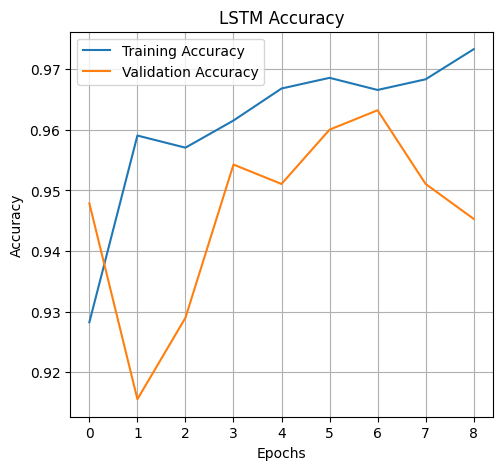

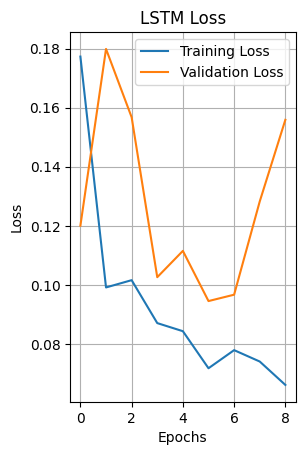

489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9681 - loss: 0.0723
Accuracy on Training Data: 0.9621
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Predicted labels saved to 'predicted_labels.csv'.
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[11993   538]
 [   54  3046]]
precision =  0.8498883928571429 
 recall =  0.9825806451612903


In [75]:
# TODO: summarize history for Accuracy
# TODO: Plot the training & validation accuracy over epochs and display the plot
# TODO: Save the plot to a file
# TODO: summarize history for Loss
# TODO: Plot the training & validation loss over epochs and display the plot
# TODO: Save the plot to a file
# Function to plot accuracy and loss during training
def plot_model_history(history, model_name):
    # Plotting training & validation accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{model_name}_accuracy_plot.png')
    plt.show()

    # Plotting training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{model_name}_loss_plot.png')
    plt.show()

# Plotting for LSTM model
plot_model_history(history_lstm, 'LSTM')

# TODO: Use the evaluate method to calculate the accuracy of the model on the training data
scores = best_lstm_model.evaluate(sequence_array, label_array, verbose=1)  # TODO: Replace with the correct code to evaluate the model on the training data

# Print the accuracy of the model on the training data
print(f'Accuracy on Training Data: {scores[1]:.4f}')

# make predictions and compute confusion matrix
# TODO: Use the predict method to make predictions on the training data
# TODO: Convert the predicted probabilities to class labels (e.g., using a threshold of 0.5)
y_pred = (best_lstm_model.predict(sequence_array) > 0.5).astype(int).flatten() # TODO: Use predict and convert probabilities to class labels
y_true = label_array.flatten()

# TODO: Create a Pandas DataFrame from the predicted labels and save it to a CSV file
test_set = pd.DataFrame({'True_Label': y_true, 'Predicted_Label': y_pred})  # TODO: Replace with the correct code to create a DataFrame from the predicted labels
test_set.to_csv('predicted_labels.csv', index=False)
print("Predicted labels saved to 'predicted_labels.csv'.")

print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
# TODO: Compute the confusion matrix using confusion_matrix from sklearn.metrics
cm = confusion_matrix(y_true, y_pred)  # TODO: Replace with the correct code to compute the confusion matrix
print(cm)

# TODO: Calculate the precision using precision_score and recall using recall_score from sklearn.metrics
precision = precision_score(y_true, y_pred)  # TODO: Replace with the correct code to calculate precision
recall = recall_score(y_true, y_pred)  # TODO: Replace with the correct code to calculate recall
print( 'precision = ', precision, '\n', 'recall = ', recall)

### LSTM: Validation set

In [78]:
import numpy as np
import pandas as pd
import os
from keras.models import load_model
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1656 - loss: 2.7494
Validation Accuracy: 0.1828
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step
Validation predictions saved to 'validation_predictions.csv'.
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[ 1 74]
 [ 1 17]]
Precision: 0.1868, Recall: 0.9444, F1-score: 0.3119


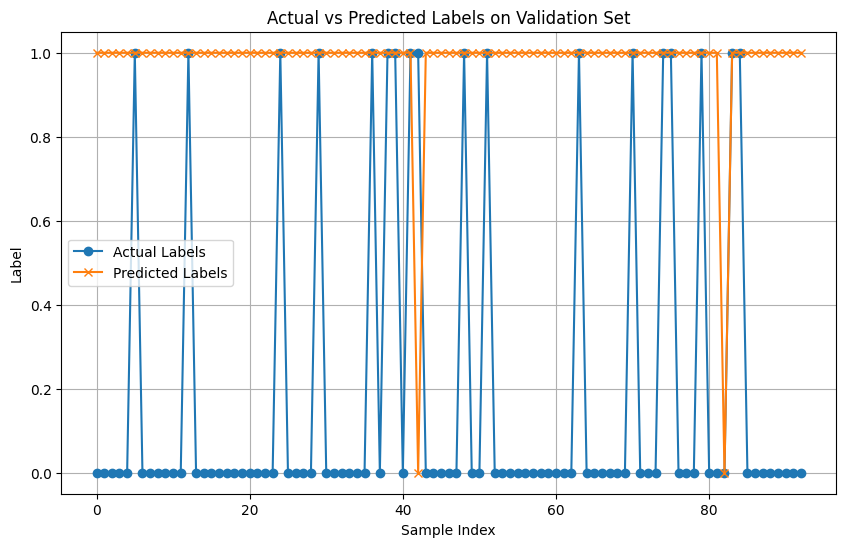

In [80]:
# TODO: Pick the last sequence for each id in the test data
seq_array_test_last = [test_df[test_df['id'] == id].iloc[-sequence_length:].values for id in test_df['id'].unique()]  # Replace with code to select last sequence for each id

# TODO: Convert to numpy array and ensure float32 data type
# Function to ensure all sequences have the same length
def pad_or_truncate_sequence(seq, target_length):
    """Pad or truncate sequences to ensure uniform length."""
    if len(seq) > target_length:
        return seq[-target_length:]  # Truncate to the last 'target_length' values
    else:
        # Pad the sequence with zeros at the start if it's shorter
        padding = np.zeros((target_length - len(seq), seq.shape[1]))
        return np.vstack((padding, seq))

# Extract last sequences for each id and filter IDs with sufficient data
seq_array_test_last = []
label_array_test_last = []

# Iterate over unique IDs to align sequences and labels
for id in test_df['id'].unique():
    id_df = test_df[test_df['id'] == id]
    if len(id_df) >= sequence_length:
        # Add the last sequence and corresponding label if the sequence length is sufficient
        seq_array_test_last.append(pad_or_truncate_sequence(id_df.iloc[:, :].values, sequence_length))
        label_array_test_last.append(label_array[test_df[test_df['id'] == id].index[-1]])

# Convert to numpy arrays and ensure float32 data type
seq_array_test_last = np.array(seq_array_test_last).astype(np.float32)
label_array_test_last = np.array(label_array_test_last).reshape(-1, 1).astype(np.float32)

model_path = 'best_lstm_model.keras'
# TODO: Load the saved model if it exists
if os.path.isfile(model_path):
    estimator = load_model(model_path)  # TODO: Replace with code to load the saved model

# TODO: Evaluate the model on the test data
scores_test = estimator.evaluate(seq_array_test_last, label_array_test_last, verbose=1)
print(f'Validation Accuracy: {scores_test[1]:.4f}')

# TODO: Make predictions and compute confusion matrix
y_pred_test = (estimator.predict(seq_array_test_last) > 0.5).astype(int)  # TODO: Replace with code to make predictions and convert to class labels
y_true_test = label_array_test_last

# TODO: Create pandas dataframe of y_pred_test and save predictions to CSV file
test_set = pd.DataFrame({'True_Label': y_true_test.flatten(), 'Predicted_Label': y_pred_test.flatten()})
test_set.to_csv('validation_predictions.csv', index=False)
print("Validation predictions saved to 'validation_predictions.csv'.")

# TODO: Compute confusion matrix
print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true_test, y_pred_test)  # TODO: Replace with code to compute confusion matrix
print(cm)

# TODO: Compute precision, recall, and F1-score
precision_test = precision_score(y_true_test, y_pred_test)  # TODO: Replace with code to compute precision
recall_test = recall_score(y_true_test, y_pred_test)  # TODO: Replace with code to compute recall
f1_test = f1_score(y_true_test, y_pred_test)  # TODO: Replace with code to compute F1-score
print(f'Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, F1-score: {f1_test:.4f}')

# TODO: Plot predicted and actual data for visual verification
plt.figure(figsize=(10, 6))
plt.plot(y_true_test, label='Actual Labels', marker='o')
plt.plot(y_pred_test, label='Predicted Labels', marker='x')
plt.title('Actual vs Predicted Labels on Validation Set')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.legend()
plt.grid(True)
plt.savefig('validation_actual_vs_predicted.png')
plt.show()

In [81]:
results_df = pd.DataFrame([[scores_test[1],precision_test,recall_test,f1_test],
                          [0.94, 0.952381, 0.8, 0.869565]],
                         columns = ['Accuracy', 'Precision', 'Recall', 'F1-score'],
                         index = ['LSTM',
                                 'Template Best Model'])
results_df

,Accuracy,Precision,Recall,F1-score
LSTM,0.182796,0.186813,0.944444,0.311927
Template Best Model,0.940000,0.952381,0.800000,0.869565


## GRU

### GRU: Test Set

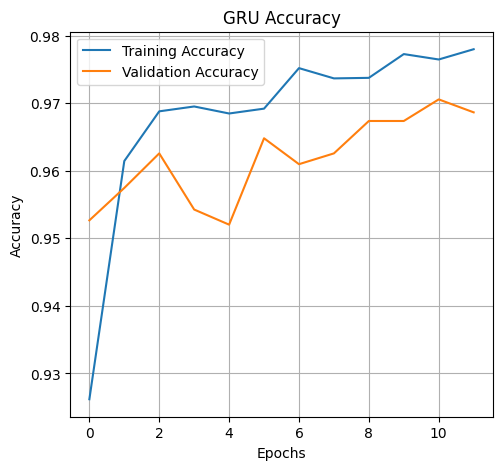

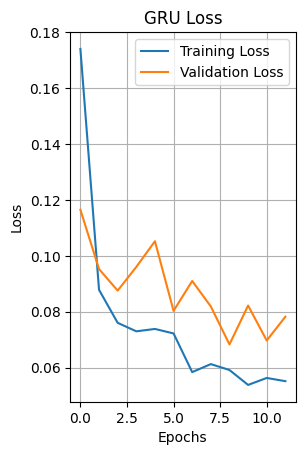

489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9851 - loss: 0.0364
Accuracy on Training Data (GRU): 0.9807


489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Predicted labels saved to 'predicted_labels_gru.csv'.
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[12355   176]
 [  126  2974]]
GRU Precision =  0.9441269841269841 
 GRU Recall =  0.9593548387096774


In [82]:
# TODO: summarize history for Accuracy
# TODO: Plot the training & validation accuracy over epochs and display the plot
# TODO: Save the plot to a file
# TODO: summarize history for Loss
# TODO: Plot the training & validation loss over epochs and display the plot
# TODO: Save the plot to a file
# Function to plot accuracy and loss during training
def plot_model_history(history, model_name):
    # Plotting training & validation accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{model_name}_accuracy_plot.png')
    plt.show()

    # Plotting training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{model_name}_loss_plot.png')
    plt.show()

# Plotting for GRU model
plot_model_history(history_gru, 'GRU')

# TODO: Use the evaluate method to calculate the accuracy of the model on the training data
scores_gru = best_gru_model.evaluate(sequence_array, label_array, verbose=1)  # TODO: Replace with the correct code to evaluate the model on the training data

# Print the accuracy of the model on the training data
print(f'Accuracy on Training Data (GRU): {scores_gru[1]:.4f}')

# make predictions and compute confusion matrix
# TODO: Use the predict method to make predictions on the training data
# TODO: Convert the predicted probabilities to class labels (e.g., using a threshold of 0.5)
y_pred_gru = (best_gru_model.predict(sequence_array) > 0.5).astype(int).flatten() # TODO: Use predict and convert probabilities to class labels
y_true = label_array.flatten()

# TODO: Create a Pandas DataFrame from the predicted labels and save it to a CSV file
test_set_gru = pd.DataFrame({'True_Label': y_true, 'Predicted_Label': y_pred_gru})  # TODO: Replace with the correct code to create a DataFrame from the predicted labels
test_set_gru.to_csv('predicted_labels_gru.csv', index=False)
print("Predicted labels saved to 'predicted_labels_gru.csv'.")

print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
# TODO: Compute the confusion matrix using confusion_matrix from sklearn.metrics
cm_gru = confusion_matrix(y_true, y_pred_gru)  # TODO: Replace with the correct code to compute the confusion matrix
print(cm_gru)

# TODO: Calculate the precision using precision_score and recall using recall_score from sklearn.metrics
precision_gru  = precision_score(y_true, y_pred_gru)  # TODO: Replace with the correct code to calculate precision
recall_gru  = recall_score(y_true, y_pred_gru)  # TODO: Replace with the correct code to calculate recall
print('GRU Precision = ', precision_gru, '\n', 'GRU Recall = ', recall_gru)

### GRU: Validation Set

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1749 - loss: 5.1333  
Validation Accuracy (GRU): 0.1935
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Validation predictions saved to 'validation_predictions_gru.csv'.
Confusion matrix for GRU
- x-axis is true labels.
- y-axis is predicted labels
[[ 0 75]
 [ 0 18]]
GRU Precision: 0.1935, Recall: 1.0000, F1-score: 0.3243


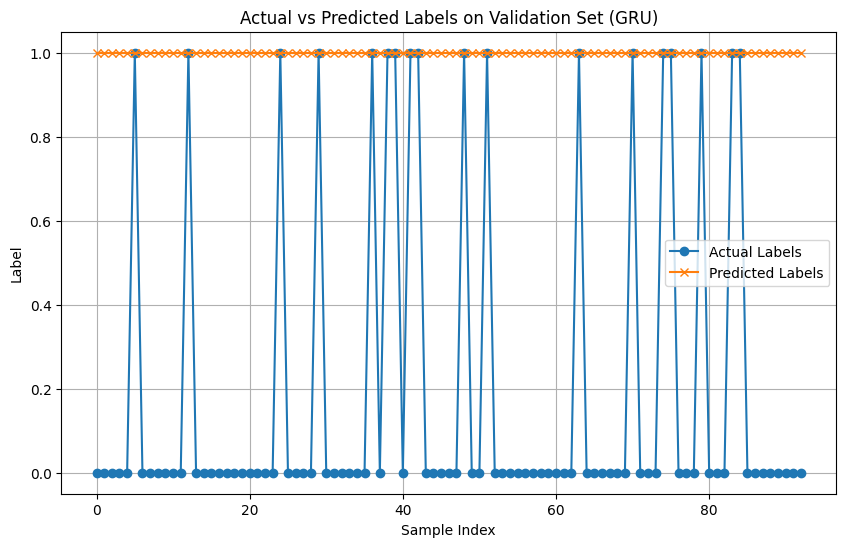

In [83]:
# Extract last sequences for each id and filter IDs with sufficient data
seq_array_test_last = []
label_array_test_last = []

# Iterate over unique IDs to align sequences and labels
for id in test_df['id'].unique():
    id_df = test_df[test_df['id'] == id]
    if len(id_df) >= sequence_length:
        # Add the last sequence and corresponding label if the sequence length is sufficient
        seq_array_test_last.append(pad_or_truncate_sequence(id_df.iloc[:, :].values, sequence_length))
        label_array_test_last.append(label_array[test_df[test_df['id'] == id].index[-1]])

# Convert to numpy arrays and ensure float32 data type
seq_array_test_last = np.array(seq_array_test_last).astype(np.float32)
label_array_test_last = np.array(label_array_test_last).reshape(-1, 1).astype(np.float32)

gru_model_path = 'best_gru_model.keras'
# Load the saved GRU model if it exists
if os.path.isfile(gru_model_path):
    estimator_gru = load_model(gru_model_path)

# Evaluate the GRU model on the test data
scores_test_gru = estimator_gru.evaluate(seq_array_test_last, label_array_test_last, verbose=1)
print(f'Validation Accuracy (GRU): {scores_test_gru[1]:.4f}')

# Make predictions and compute confusion matrix for GRU
y_pred_test_gru = (estimator_gru.predict(seq_array_test_last) > 0.5).astype(int)
y_true_test_gru = label_array_test_last

# Create pandas dataframe of y_pred_test and save predictions to CSV file
test_set_gru = pd.DataFrame({'True_Label': y_true_test_gru.flatten(), 'Predicted_Label': y_pred_test_gru.flatten()})
test_set_gru.to_csv('validation_predictions_gru.csv', index=False)
print("Validation predictions saved to 'validation_predictions_gru.csv'.")

# Compute confusion matrix for GRU
print('Confusion matrix for GRU\n- x-axis is true labels.\n- y-axis is predicted labels')
cm_gru = confusion_matrix(y_true_test_gru, y_pred_test_gru)
print(cm_gru)

# Compute precision, recall, and F1-score for GRU
precision_test_gru = precision_score(y_true_test_gru, y_pred_test_gru)
recall_test_gru = recall_score(y_true_test_gru, y_pred_test_gru)
f1_test_gru = f1_score(y_true_test_gru, y_pred_test_gru)
print(f'GRU Precision: {precision_test_gru:.4f}, Recall: {recall_test_gru:.4f}, F1-score: {f1_test_gru:.4f}')

# Plot predicted and actual data for visual verification
plt.figure(figsize=(10, 6))
plt.plot(y_true_test_gru, label='Actual Labels', marker='o')
plt.plot(y_pred_test_gru, label='Predicted Labels', marker='x')
plt.title('Actual vs Predicted Labels on Validation Set (GRU)')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.legend()
plt.grid(True)
plt.savefig('validation_actual_vs_predicted_gru.png')
plt.show()

# Bonus

In [89]:
import pandas as pd
import numpy as np

In [94]:
Bonus_train = '/content/train/CMaps/train_FD002.txt'
Bonus_test = '/content/train/CMaps/test_FD002.txt'
Bonus_truth = '/content/train/CMaps/RUL_FD002.txt'

In [95]:
# Read training data - Aircraft engine run-to-failure data
train_bonus_df = pd.read_csv(Bonus_train, sep="\s+", header=None, engine='python') # Read the txt file, use appropriate separator and header
train_bonus_df.drop([26, 27], axis=1, inplace=True, errors='ignore')  # Explore the data on your own and remove unnecessary columns
train_bonus_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3'] + ['sensor' + str(i) for i in range(1, 22)]  # Assign names to all the columns
train_bonus_df = train_bonus_df.sort_values(['id', 'cycle'])  # Sort by id and cycle

# Read test data - Aircraft engine operating data without failure events recorded
test_bonus_df = pd.read_csv(Bonus_test, sep="\s+", header=None, engine='python')  # Read the txt file, use appropriate separator and header
test_bonus_df.drop([26, 27], axis=1, inplace=True, errors='ignore')  # Explore the data on your own and remove unnecessary columns
test_bonus_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3'] + ['sensor' + str(i) for i in range(1, 22)]  # Assign names to all the columns
test_bonus_df = test_bonus_df.sort_values(['id', 'cycle'])

# Read ground truth data - True remaining cycles for each engine in testing data
truth_truth_df = pd.read_csv(Bonus_truth, sep="\s+", header=None, engine='python') # Read the txt file, use appropriate separator and header
truth_truth_df.dropna(axis=1, inplace=True)  # Explore the data on your own and remove unnecessary columns


In [96]:
# Generate RUL for training data
rul_bonus = train_bonus_df.groupby('id')['cycle'].max().reset_index()
rul_bonus.columns = ['id', 'max_cycle']
train_bonus_df = train_bonus_df.merge(rul_bonus, on='id', how='left')
train_bonus_df['RUL'] = train_bonus_df['max_cycle'] - train_bonus_df['cycle']
train_bonus_df.drop('max_cycle', axis=1, inplace=True)

# Calculate RUL for test data using the ground truth
truth_truth_df.columns = ['more']
truth_truth_df['id'] = truth_truth_df.index + 1
rul_test_bonus = test_bonus_df.groupby('id')['cycle'].max().reset_index()
rul_test_bonus.columns = ['id', 'max_cycle']
truth_truth_df['max'] = rul_test_bonus['max_cycle'] + truth_truth_df['more']
test_bonus_df = test_bonus_df.merge(truth_truth_df[['id', 'max']], on='id', how='left')
test_bonus_df['RUL'] = test_bonus_df['max'] - test_bonus_df['cycle']
test_bonus_df.drop('max', axis=1, inplace=True)

# Display the first few rows of the training and test datasets to verify
print(train_bonus_df.head())
print(test_bonus_df.head())


   id  cycle  setting1  setting2  setting3  sensor1  sensor2  sensor3  \
0   1      1   34.9983    0.8400     100.0   449.44   555.32  1358.61   
1   1      2   41.9982    0.8408     100.0   445.00   549.90  1353.22   
2   1      3   24.9988    0.6218      60.0   462.54   537.31  1256.76   
3   1      4   42.0077    0.8416     100.0   445.00   549.51  1354.03   
4   1      5   25.0005    0.6203      60.0   462.54   537.07  1257.71   

   sensor4  sensor5  ...  sensor13  sensor14  sensor15  sensor16  sensor17  \
0  1137.23     5.48  ...   2387.72   8048.56    9.3461      0.02       334   
1  1125.78     3.91  ...   2387.66   8072.30    9.3774      0.02       330   
2  1047.45     7.05  ...   2028.03   7864.87   10.8941      0.02       309   
3  1126.38     3.91  ...   2387.61   8068.66    9.3528      0.02       329   
4  1047.93     7.05  ...   2028.00   7861.23   10.8963      0.02       309   

   sensor18  sensor19  sensor20  sensor21  RUL  
0      2223    100.00     14.73    8.8071  

In [97]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Create additional features (mean, max, min, std) for each sensor in the training set
for sensor in [f'sensor{i}' for i in range(1, 22)]:
    train_bonus_df[f'{sensor}_mean'] = train_bonus_df.groupby('id')[sensor].transform('mean')
    train_bonus_df[f'{sensor}_max'] = train_bonus_df.groupby('id')[sensor].transform('max')
    train_bonus_df[f'{sensor}_min'] = train_bonus_df.groupby('id')[sensor].transform('min')
    train_bonus_df[f'{sensor}_std'] = train_bonus_df.groupby('id')[sensor].transform('std')

# Create lag features for training data
lagged_frames = []  # List to collect all lagged columns
lag_features = 3  # Number of lagged features

# Generate lag features for training set
for sensor in [f'sensor{i}' for i in range(1, 22)]:
    for lag in range(1, lag_features + 1):
        lagged = train_bonus_df.groupby('id')[sensor].shift(lag)
        lagged.name = f'{sensor}_lag_{lag}'
        lagged_frames.append(lagged)

# Combine all lagged features into the training DataFrame
lagged_df = pd.concat(lagged_frames, axis=1)
train_bonus_df = pd.concat([train_bonus_df, lagged_df], axis=1)

# Drop rows with NaN values introduced by lagging
train_bonus_df.dropna(inplace=True)

# Repeat the feature creation process for the test set
# Create additional features (mean, max, min, std) for each sensor in the test set
for sensor in [f'sensor{i}' for i in range(1, 22)]:
    test_bonus_df[f'{sensor}_mean'] = test_bonus_df.groupby('id')[sensor].transform('mean')
    test_bonus_df[f'{sensor}_max'] = test_bonus_df.groupby('id')[sensor].transform('max')
    test_bonus_df[f'{sensor}_min'] = test_bonus_df.groupby('id')[sensor].transform('min')
    test_bonus_df[f'{sensor}_std'] = test_bonus_df.groupby('id')[sensor].transform('std')

# Create lag features for the test set
lagged_frames_test = []

# Generate lag features for test set
for sensor in [f'sensor{i}' for i in range(1, 22)]:
    for lag in range(1, lag_features + 1):
        lagged = test_bonus_df.groupby('id')[sensor].shift(lag)
        lagged.name = f'{sensor}_lag_{lag}'
        lagged_frames_test.append(lagged)

# Combine all lagged features into the test DataFrame
lagged_df_test = pd.concat(lagged_frames_test, axis=1)
test_bonus_df = pd.concat([test_bonus_df, lagged_df_test], axis=1)

# Drop rows with NaN values introduced by lagging
test_bonus_df.dropna(inplace=True)

In [98]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

#######
# TRAIN
#######

# Data Labeling - generate column RUL (Remaining Useful Life or Time to Failure)

# Calculate the maximum cycle value for each engine (id) and store it in a new DataFrame (rul)
rul_bonus = train_bonus_df.groupby('id')['cycle'].max().reset_index()

# Rename the columns in the rul DataFrame
rul_bonus.columns = ['id', 'max_cycle']

# Merge the rul DataFrame with the original train_bonus_df based on the 'id' column
train_bonus_df = train_bonus_df.merge(rul_bonus, on='id', how='left')

# Calculate the Remaining Useful Life (RUL) by subtracting the current cycle from the maximum cycle
train_bonus_df['RUL'] = train_bonus_df['max_cycle'] - train_bonus_df['cycle']

# Remove the temporary column used to calculate RUL
train_bonus_df.drop('max_cycle', axis=1, inplace=True)

# Generate label columns for training data
# We will only make use of "label1" for binary classification,
# while trying to answer the question: is a specific engine going to fail within w1 cycles?
w1 = 30
w0 = 15

# Create a binary label ('label1') indicating if the engine will fail within w1 cycles (1) or not (0)
train_bonus_df['label1'] = (train_bonus_df['RUL'] <= w1).astype(int)

# Initialize a second label ('label2') as a copy of 'label1'
train_bonus_df['label2'] = train_bonus_df['label1'].copy()

# Update 'label2' to indicate if the engine will fail within w0 cycles (2) or not (0/1)
train_bonus_df.loc[train_bonus_df['RUL'] <= w0, 'label2'] = 2

# MinMax normalization (from 0 to 1)
# Create a normalized version of the 'cycle' column (e.g., 'cycle_norm') using the original 'cycle' values
train_bonus_df['cycle_norm'] = train_bonus_df['cycle'] / train_bonus_df['cycle'].max()

# Select the columns to be normalized (all columns except 'id', 'cycle', 'RUL', 'label1', and 'label2')
cols_normalize = train_bonus_df.columns.difference(['id', 'cycle', 'RUL', 'label1', 'label2'])

# Initialize a MinMaxScaler object to scale values between 0 and 1
min_max_scaler = MinMaxScaler()

# Apply MinMaxScaler to the selected columns and create a new normalized DataFrame
norm_train_bonus_df = pd.DataFrame(min_max_scaler.fit_transform(train_bonus_df[cols_normalize]),
                                   columns=cols_normalize,
                                   index=train_bonus_df.index)

# Join the normalized DataFrame with the original DataFrame (excluding normalized columns)
join_bonus_df = train_bonus_df[['id', 'cycle', 'RUL', 'label1', 'label2']].join(norm_train_bonus_df)

# Reorder the columns in the joined DataFrame to match the original order
train_bonus_df = join_bonus_df.reindex(columns=train_bonus_df.columns)

print(f"Final Train DataFrame Shape: {train_bonus_df.shape}")
print(train_bonus_df.head())


Final Train DataFrame Shape: (52979, 177)
   id  cycle  setting1  setting2  setting3   sensor1   sensor2   sensor3  \
0   1      4  0.999993  0.999525       1.0  0.000000  0.128269  0.298795   
1   1      5  0.595137  0.736698       0.0  0.238089  0.014130  0.037871   
2   1      6  0.595232  0.736936       0.0  0.238089  0.013671  0.061357   
3   1      7  0.999912  0.998694       1.0  0.000000  0.130379  0.280970   
4   1      8  0.476147  0.831591       1.0  0.626985  0.659785  0.644616   

    sensor4   sensor5  ...  sensor19_lag_3  sensor20_lag_1  sensor20_lag_2  \
0  0.246979  0.000000  ...             1.0        0.133745        0.007888   
1  0.058152  0.293184  ...             1.0        0.014060        0.133745   
2  0.060054  0.293184  ...             0.0        0.135460        0.014060   
3  0.248929  0.000000  ...             1.0        0.140604        0.135460   
4  0.550209  0.507937  ...             0.0        0.015089        0.140604   

   sensor20_lag_3  sensor21_lag_

In [101]:
#######
# TEST
#######

# MinMax normalization (from 0 to 1)
# Create a normalized version of the 'cycle' column (e.g., 'cycle_norm') using the original 'cycle' values
test_bonus_df['cycle_norm'] = test_bonus_df['cycle'] / test_bonus_df['cycle'].max()

# Select the columns to be normalized (all columns except 'id', 'cycle', 'RUL', 'label1', and 'label2')
cols_normalize = test_bonus_df.columns.difference(['id', 'cycle', 'RUL', 'label1', 'label2'])

# Apply MinMaxScaler to the selected columns and create a new normalized DataFrame
norm_test_bonus_df = pd.DataFrame(min_max_scaler.transform(test_bonus_df[cols_normalize]),
                                  columns=cols_normalize,
                                  index=test_bonus_df.index)

# Join the normalized DataFrame with the original test DataFrame (excluding normalized columns)
test_join_bonus_df = test_bonus_df[['id', 'cycle']].join(norm_test_bonus_df)

# Reorder the columns in the joined DataFrame to match the original order
test_bonus_df = test_join_bonus_df.reindex(columns=test_bonus_df.columns)

# We use the ground truth dataset to generate labels for the test data.
# Calculate the maximum cycle value for each engine (id) in the test data and store it in a new DataFrame (rul_test_bonus)
rul_test_bonus = test_bonus_df.groupby('id')['cycle'].max().reset_index()

# Rename the columns in the rul DataFrame
rul_test_bonus.columns = ['id', 'max_cycle']

print(truth_truth_df.head())
print(f"Number of columns in truth_truth_df: {truth_truth_df.shape[1]}")

# Merge the rul DataFrame with the original test_bonus_df based on the 'id' column
truth_truth_df.columns = ['id', 'max', 'more']
truth_truth_df['id'] = truth_truth_df.index + 1
truth_truth_df['max'] = rul_test_bonus['max_cycle'] + truth_truth_df['more']

# Merge the adjusted truth_truth_df with the test_bonus_df to generate RUL values for the test data
test_bonus_df = test_bonus_df.merge(truth_truth_df[['id', 'max']], on='id', how='left')

# Calculate the Remaining Useful Life (RUL) by subtracting the current cycle from the maximum cycle
test_bonus_df['RUL'] = test_bonus_df['max'] - test_bonus_df['cycle']

# Remove the temporary column used to calculate RUL
test_bonus_df.drop('max', axis=1, inplace=True)

# Generate binary label columns (label1 and label2) based on RUL values and thresholds w0 and w1
test_bonus_df['label1'] = (test_bonus_df['RUL'] <= w1).astype(int)
test_bonus_df['label2'] = test_bonus_df['label1'].copy()
test_bonus_df.loc[test_bonus_df['RUL'] <= w0, 'label2'] = 2

# Align the columns of test_bonus_df to match the order of train_bonus_df
test_bonus_df = test_bonus_df.reindex(columns=train_bonus_df.columns)

# Optional: Verify the new column order
print("Aligned test_bonus_df columns:", test_bonus_df.columns)
print(f"Final Test DataFrame Shape: {test_bonus_df.shape}")
print(test_bonus_df.head())


   more  id  max
0    18   1  276
1    79   2  134
2   106   3  271
3   110   4  196
4    15   5  163
Number of columns in truth_truth_df: 3
Aligned test_bonus_df columns: Index(['id', 'cycle', 'setting1', 'setting2', 'setting3', 'sensor1', 'sensor2',
       'sensor3', 'sensor4', 'sensor5',
       ...
       'sensor19_lag_3', 'sensor20_lag_1', 'sensor20_lag_2', 'sensor20_lag_3',
       'sensor21_lag_1', 'sensor21_lag_2', 'sensor21_lag_3', 'label1',
       'label2', 'cycle_norm'],
      dtype='object', length=177)
Final Test DataFrame Shape: (33214, 177)
   id  cycle  setting1  setting2  setting3   sensor1   sensor2   sensor3  \
0   1      4  0.000567  1.408834 -1.536875 -6.122444 -4.958642 -3.378297   
1   1      5  0.000337  1.040795 -1.537500 -6.122400 -4.958652 -3.378299   
2   1      6  0.000337  1.039622 -1.537500 -6.122400 -4.958652 -3.378299   
3   1      7  0.000567  1.407158 -1.536875 -6.122444 -4.958642 -3.378297   
4   1      8  0.000567  1.407829 -1.536875 -6.122444 -4.9586

In [103]:
# Function to generate sequences for the given DataFrame, ensuring consistency in shapes
def generate_sequences(id_df, sequence_length, feature_columns):
    """Generate sequences from a dataframe for a given id."""
    data_matrix = id_df[feature_columns].values
    num_elements = data_matrix.shape[0]

    # Yield consistent 3D shaped sequences
    for start, end in zip(range(0, num_elements - sequence_length), range(sequence_length, num_elements)):
        yield data_matrix[start:end, :]

# Adjusted function to generate sequences and labels consistently
def generate_sequences_and_labels(df, sequence_length, label_col):
    sequence_list = []
    label_list = []

    # Iterate over unique IDs to generate sequences and labels
    for id in df['id'].unique():
        id_df = df[df['id'] == id]
        sequences = list(generate_sequences(id_df, sequence_length, id_df.columns.difference(['id', 'RUL', 'label1', 'label2'])))

        # Only add sequences that are of the correct shape
        if sequences:  # Ensure that sequences are not empty
            sequence_list.extend(sequences)
            labels = generate_labels(id_df, sequence_length, label_col)
            label_list.extend(labels)

    # Convert the lists to arrays and ensure proper shapes
    sequence_array = np.array(sequence_list)
    label_array = np.array(label_list)

    # Ensure the sequences are 3D and labels are 1D
    if len(sequence_array.shape) == 2:  # Check if there was a collapse in dimensionality
        sequence_array = sequence_array.reshape(-1, sequence_length, sequence_array.shape[1])

    return sequence_array, label_array

# Generate sequences and labels for training data
sequence_array_train, label_array_train = generate_sequences_and_labels(train_bonus_df, sequence_length, 'label1')

# Generate sequences and labels for test data
sequence_array_test, label_array_test = generate_sequences_and_labels(test_bonus_df, sequence_length, 'label1')

print(f"Training Sequence Array Shape: {sequence_array_train.shape}")
print(f"Training Label Array Shape: {label_array_train.shape}")
print(f"Test Sequence Array Shape: {sequence_array_test.shape}")
print(f"Test Label Array Shape: {label_array_test.shape}")


Training Sequence Array Shape: (39979, 50, 173)
Training Label Array Shape: (39979,)
Test Sequence Array Shape: (20653, 50, 173)
Test Label Array Shape: (20653,)


In [104]:
# List of columns to drop for FD002 to match FD001 configuration
columns_to_drop = [
    'sensor13_lag_1', 'sensor13_lag_2', 'sensor13_lag_3', 'sensor6_mean_lag_1', 'sensor6_mean_lag_2',
    'sensor6_mean_lag_3', 'sensor6_max_lag_1', 'sensor6_max_lag_2', 'sensor6_max_lag_3', 'sensor8_mean_lag_1',
    'sensor8_mean_lag_2', 'sensor8_mean_lag_3', 'sensor8_max_lag_1', 'sensor8_max_lag_2', 'sensor8_max_lag_3',
    'sensor8_min_lag_1', 'sensor8_min_lag_2', 'sensor8_min_lag_3', 'sensor13_mean_lag_1', 'sensor13_mean_lag_2',
    'sensor13_mean_lag_3', 'sensor13_max_lag_1', 'sensor13_max_lag_2', 'sensor13_max_lag_3', 'sensor13_min_lag_1',
    'sensor13_min_lag_2', 'sensor13_min_lag_3', 'sensor14', 'sensor3_mean', 'sensor4_mean', 'sensor9_std',
    'sensor11_mean', 'sensor11_min', 'sensor12_mean', 'sensor12_std', 'sensor13_mean', 'sensor13_std', 'sensor14_mean',
    'sensor14_max', 'sensor14_std', 'sensor15_mean', 'sensor17_mean', 'sensor20_mean', 'sensor21_mean', 'sensor3_lag_3',
    'sensor6_lag_1', 'sensor6_lag_2', 'sensor6_lag_3', 'sensor7_lag_1', 'sensor7_lag_2', 'sensor7_lag_3', 'sensor8_lag_1',
    'sensor8_lag_2', 'sensor8_lag_3', 'sensor9_lag_2', 'sensor9_lag_3', 'sensor11_lag_2', 'sensor11_lag_3',
    'sensor12_lag_1', 'sensor12_lag_2', 'sensor12_lag_3', 'sensor14_lag_1', 'sensor14_lag_2', 'sensor14_lag_3',
    'sensor15_lag_2', 'sensor15_lag_3', 'sensor17_lag_3', 'sensor20_lag_3', 'sensor21_lag_3', 'sensor2_mean_lag_1',
    'sensor2_mean_lag_2', 'sensor2_mean_lag_3', 'sensor2_max_lag_1', 'sensor2_max_lag_2', 'sensor2_max_lag_3',
    'sensor2_min_lag_1', 'sensor2_min_lag_2', 'sensor2_min_lag_3', 'sensor2_std_lag_1', 'sensor2_std_lag_2',
    'sensor2_std_lag_3', 'sensor3_mean_lag_1', 'sensor3_mean_lag_2', 'sensor3_mean_lag_3', 'sensor3_max_lag_1',
    'sensor3_max_lag_2', 'sensor3_max_lag_3', 'sensor3_min_lag_1', 'sensor3_min_lag_2', 'sensor3_min_lag_3',
    'sensor3_std_lag_1', 'sensor3_std_lag_2', 'sensor3_std_lag_3', 'sensor4_mean_lag_1', 'sensor4_mean_lag_2',
    'sensor4_mean_lag_3', 'sensor4_max_lag_1', 'sensor4_max_lag_2', 'sensor4_max_lag_3', 'sensor4_min_lag_1',
    'sensor4_min_lag_2', 'sensor4_min_lag_3', 'sensor4_std_lag_1', 'sensor4_std_lag_2', 'sensor4_std_lag_3',
    'sensor6_min_lag_1', 'sensor6_min_lag_2', 'sensor6_min_lag_3', 'sensor6_std_lag_1', 'sensor6_std_lag_2',
    'sensor6_std_lag_3', 'sensor7_mean_lag_1', 'sensor7_mean_lag_2', 'sensor7_mean_lag_3', 'sensor7_max_lag_1',
    'sensor7_max_lag_2', 'sensor7_max_lag_3', 'sensor7_min_lag_1', 'sensor7_min_lag_2', 'sensor7_min_lag_3',
    'sensor7_std_lag_1', 'sensor7_std_lag_2', 'sensor7_std_lag_3', 'sensor8_std_lag_1', 'sensor8_std_lag_2',
    'sensor8_std_lag_3', 'sensor9_mean_lag_1', 'sensor9_mean_lag_2', 'sensor9_mean_lag_3', 'sensor9_min_lag_1',
    'sensor9_min_lag_2', 'sensor9_min_lag_3', 'sensor9_std_lag_1', 'sensor9_std_lag_2', 'sensor9_std_lag_3',
    'sensor11_mean_lag_1', 'sensor11_mean_lag_2', 'sensor11_mean_lag_3', 'sensor11_max_lag_1', 'sensor11_max_lag_2',
    'sensor11_max_lag_3', 'sensor11_min_lag_1', 'sensor11_min_lag_2', 'sensor11_min_lag_3', 'sensor11_std_lag_1',
    'sensor11_std_lag_2', 'sensor11_std_lag_3', 'sensor12_mean_lag_1', 'sensor12_mean_lag_2', 'sensor12_mean_lag_3',
    'sensor12_max_lag_1', 'sensor12_max_lag_2', 'sensor12_max_lag_3', 'sensor12_min_lag_1', 'sensor12_min_lag_2',
    'sensor12_min_lag_3', 'sensor12_std_lag_1', 'sensor12_std_lag_2', 'sensor12_std_lag_3', 'sensor13_std_lag_1',
    'sensor13_std_lag_2', 'sensor13_std_lag_3', 'sensor14_mean_lag_1', 'sensor14_mean_lag_2', 'sensor14_mean_lag_3',
    'sensor14_max_lag_1', 'sensor14_max_lag_2', 'sensor14_max_lag_3', 'sensor14_min_lag_1', 'sensor14_min_lag_2',
    'sensor14_min_lag_3', 'sensor14_std_lag_1', 'sensor14_std_lag_2', 'sensor14_std_lag_3', 'sensor15_mean_lag_1',
    'sensor15_mean_lag_2', 'sensor15_mean_lag_3', 'sensor15_max_lag_1', 'sensor15_max_lag_2', 'sensor15_max_lag_3',
    'sensor15_min_lag_1', 'sensor15_min_lag_2', 'sensor15_min_lag_3', 'sensor15_std_lag_1', 'sensor15_std_lag_2',
    'sensor15_std_lag_3', 'sensor17_mean_lag_1', 'sensor17_mean_lag_2', 'sensor17_mean_lag_3', 'sensor17_max_lag_1',
    'sensor17_max_lag_2', 'sensor17_max_lag_3', 'sensor17_min_lag_1', 'sensor17_min_lag_2', 'sensor17_min_lag_3',
    'sensor17_std_lag_1', 'sensor17_std_lag_2', 'sensor17_std_lag_3', 'sensor20_mean_lag_1', 'sensor20_mean_lag_2',
    'sensor20_mean_lag_3', 'sensor20_max_lag_1', 'sensor20_max_lag_2', 'sensor20_max_lag_3', 'sensor20_min_lag_1',
    'sensor20_min_lag_2', 'sensor20_min_lag_3', 'sensor20_std_lag_1', 'sensor20_std_lag_2', 'sensor20_std_lag_3',
    'sensor21_mean_lag_1', 'sensor21_mean_lag_2', 'sensor21_mean_lag_3', 'sensor21_max_lag_1', 'sensor21_max_lag_2',
    'sensor21_max_lag_3', 'sensor21_min_lag_1', 'sensor21_min_lag_2','sensor21_min_lag_3', 'sensor21_std_lag_1', 'sensor21_std_lag_2', 'sensor21_std_lag_3'
]

# Drop the columns from the train and test datasets
train_bonus_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
test_bonus_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Display the final shapes to ensure the columns were dropped correctly
print(f"Final Train DataFrame Shape: {train_bonus_df.shape}")
print(f"Final Test DataFrame Shape: {test_bonus_df.shape}")


Final Train DataFrame Shape: (52979, 132)
Final Test DataFrame Shape: (33214, 132)


In [105]:
train_bonus_df.columns

Index(['id', 'cycle', 'setting1', 'setting2', 'setting3', 'sensor1', 'sensor2',
       'sensor3', 'sensor4', 'sensor5',
       ...
       'sensor19_lag_1', 'sensor19_lag_2', 'sensor19_lag_3', 'sensor20_lag_1',
       'sensor20_lag_2', 'sensor21_lag_1', 'sensor21_lag_2', 'label1',
       'label2', 'cycle_norm'],
      dtype='object', length=132)

In [106]:
# Define the exact columns you need to match FD001
desired_columns = [
    'id', 'cycle', 'setting1', 'setting2', 'sensor2', 'sensor3', 'sensor4',
    'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12',
    'sensor13', 'sensor15', 'sensor17', 'sensor20', 'sensor21',
    'sensor2_mean', 'sensor2_max', 'sensor2_min', 'sensor2_std',
    'sensor3_max', 'sensor3_min', 'sensor3_std', 'sensor4_max',
    'sensor4_min', 'sensor4_std', 'sensor6_mean', 'sensor6_max',
    'sensor6_min', 'sensor6_std', 'sensor7_mean', 'sensor7_max',
    'sensor7_min', 'sensor7_std', 'sensor8_mean', 'sensor8_max',
    'sensor8_min', 'sensor8_std', 'sensor9_mean', 'sensor9_max',
    'sensor9_min', 'sensor11_max', 'sensor11_std', 'sensor12_max',
    'sensor12_min', 'sensor13_max', 'sensor13_min', 'sensor14_min',
    'sensor15_max', 'sensor15_min', 'sensor15_std', 'sensor17_max',
    'sensor17_min', 'sensor17_std', 'sensor20_max', 'sensor20_min',
    'sensor20_std', 'sensor21_max', 'sensor21_min', 'sensor21_std',
    'sensor2_lag_1', 'sensor2_lag_2', 'sensor2_lag_3', 'sensor3_lag_1',
    'sensor3_lag_2', 'sensor4_lag_1', 'sensor4_lag_2', 'sensor4_lag_3',
    'sensor9_lag_1', 'sensor11_lag_1', 'sensor15_lag_1', 'sensor17_lag_1',
    'sensor17_lag_2', 'sensor20_lag_1', 'sensor20_lag_2', 'sensor21_lag_1',
    'sensor21_lag_2', 'sensor9_max_lag_1', 'sensor9_max_lag_2',
    'sensor9_max_lag_3', 'RUL', 'label1', 'label2', 'cycle_norm'
]

# Drop any columns that are not in the desired list
columns_to_drop = set(train_bonus_df.columns) - set(desired_columns)
train_bonus_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
test_bonus_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Ensure all desired columns are present
for col in desired_columns:
    if col not in train_bonus_df.columns:
        # If column is missing, create it with NaN or zeros as default
        train_bonus_df[col] = 0  # Adjust default value as necessary
        test_bonus_df[col] = 0

# Reorder the columns to match the desired order
train_bonus_df = train_bonus_df[desired_columns]
test_bonus_df = test_bonus_df[desired_columns]

# Display the shapes and column lists to confirm
print(f"Final Train DataFrame Shape: {train_bonus_df.shape}")
print(f"Train DataFrame Columns: {train_bonus_df.columns.tolist()}")
print(f"Final Test DataFrame Shape: {test_bonus_df.shape}")
print(f"Test DataFrame Columns: {test_bonus_df.columns.tolist()}")


Final Train DataFrame Shape: (52979, 86)
Train DataFrame Columns: ['id', 'cycle', 'setting1', 'setting2', 'sensor2', 'sensor3', 'sensor4', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12', 'sensor13', 'sensor15', 'sensor17', 'sensor20', 'sensor21', 'sensor2_mean', 'sensor2_max', 'sensor2_min', 'sensor2_std', 'sensor3_max', 'sensor3_min', 'sensor3_std', 'sensor4_max', 'sensor4_min', 'sensor4_std', 'sensor6_mean', 'sensor6_max', 'sensor6_min', 'sensor6_std', 'sensor7_mean', 'sensor7_max', 'sensor7_min', 'sensor7_std', 'sensor8_mean', 'sensor8_max', 'sensor8_min', 'sensor8_std', 'sensor9_mean', 'sensor9_max', 'sensor9_min', 'sensor11_max', 'sensor11_std', 'sensor12_max', 'sensor12_min', 'sensor13_max', 'sensor13_min', 'sensor14_min', 'sensor15_max', 'sensor15_min', 'sensor15_std', 'sensor17_max', 'sensor17_min', 'sensor17_std', 'sensor20_max', 'sensor20_min', 'sensor20_std', 'sensor21_max', 'sensor21_min', 'sensor21_std', 'sensor2_lag_1', 'sensor2_lag_2', 'sensor2_lag_3'

In [108]:
import os
print(os.getcwd())


/content


In [109]:
import os
print(os.listdir(os.getcwd()))


['.config', 'nasa-cmaps.zip', 'train', 'sample_data']


Evaluating LSTM Model on FD002 Test Data...
646/646 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2079 - loss: 0.6882
LSTM Model - Loss: 0.6774, Accuracy: 0.2420
Evaluating GRU Model on FD002 Test Data...
646/646 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0115 - loss: 6.5839
GRU Model - Loss: 6.5884, Accuracy: 0.0095
Making Predictions with LSTM Model...
646/646 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Making Predictions with GRU Model...
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Evaluating LSTM Predictions...
LSTM Confusion Matrix:
 [[20017   636]
 [    0     0]]
LSTM Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000
Evaluating GRU Predictions...
GRU Confusion Matrix:
 [[  155 20498]
 [    0     0]]
GRU Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


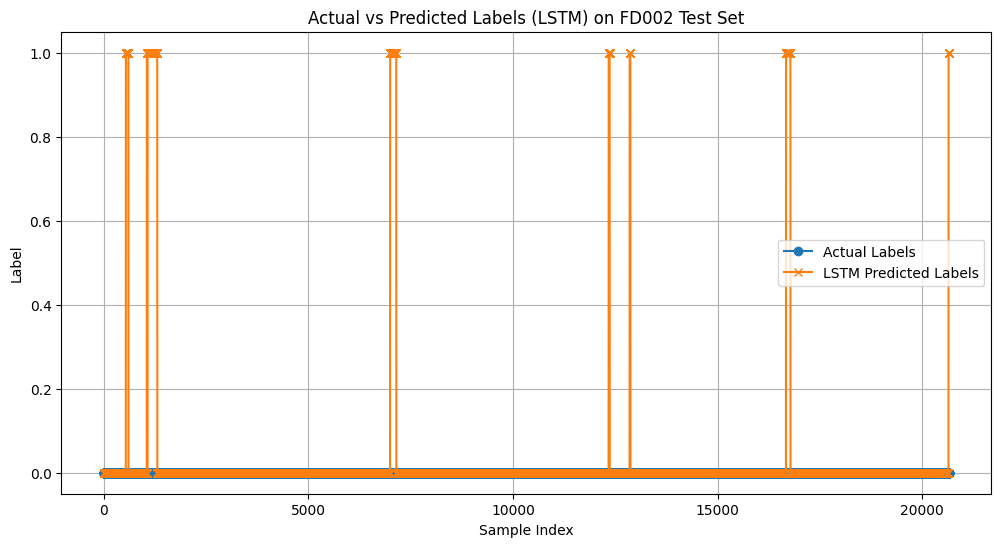

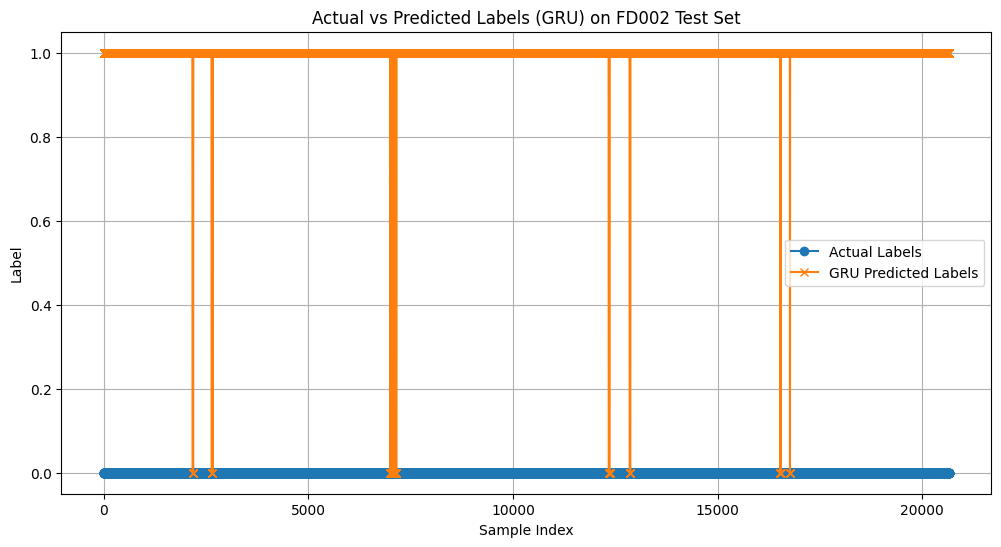

In [121]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
gru_model_save_path = '/content/saved_models/best_gru_model.keras'  # You can adjust the path and filename as needed
model_save_path = '/content/saved_models/best_lstm_model.keras'
# Load the saved LSTM and GRU models
gru_model = load_model(gru_model_save_path)
lstm_model = load_model(model_save_path)

# Evaluate LSTM Model on FD002 Test Data
print("Evaluating LSTM Model on FD002 Test Data...")
lstm_scores = lstm_model.evaluate(sequence_array_test, label_array_test, verbose=1)
print(f"LSTM Model - Loss: {lstm_scores[0]:.4f}, Accuracy: {lstm_scores[1]:.4f}")

# Evaluate GRU Model on FD002 Test Data
print("Evaluating GRU Model on FD002 Test Data...")
gru_scores = gru_model.evaluate(sequence_array_test, label_array_test, verbose=1)
print(f"GRU Model - Loss: {gru_scores[0]:.4f}, Accuracy: {gru_scores[1]:.4f}")

# Make predictions with LSTM
print("Making Predictions with LSTM Model...")
lstm_predictions = (lstm_model.predict(sequence_array_test) > 0.5).astype(int).flatten()

# Make predictions with GRU
print("Making Predictions with GRU Model...")
gru_predictions = (gru_model.predict(sequence_array_test) > 0.5).astype(int).flatten()

# Ground truth labels
y_true = label_array_test.flatten()

# Evaluate LSTM predictions
print("Evaluating LSTM Predictions...")
lstm_cm = confusion_matrix(y_true, lstm_predictions)
lstm_precision = precision_score(y_true, lstm_predictions)
lstm_recall = recall_score(y_true, lstm_predictions)
lstm_f1 = f1_score(y_true, lstm_predictions)

print("LSTM Confusion Matrix:\n", lstm_cm)
print(f"LSTM Precision: {lstm_precision:.4f}, Recall: {lstm_recall:.4f}, F1-Score: {lstm_f1:.4f}")

# Evaluate GRU predictions
print("Evaluating GRU Predictions...")
gru_cm = confusion_matrix(y_true, gru_predictions)
gru_precision = precision_score(y_true, gru_predictions)
gru_recall = recall_score(y_true, gru_predictions)
gru_f1 = f1_score(y_true, gru_predictions)

print("GRU Confusion Matrix:\n", gru_cm)
print(f"GRU Precision: {gru_precision:.4f}, Recall: {gru_recall:.4f}, F1-Score: {gru_f1:.4f}")

# Plot Actual vs Predicted for LSTM
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual Labels', marker='o')
plt.plot(lstm_predictions, label='LSTM Predicted Labels', marker='x')
plt.title('Actual vs Predicted Labels (LSTM) on FD002 Test Set')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.legend()
plt.grid(True)
plt.savefig('fd002_lstm_actual_vs_predicted.png')
plt.show()

# Plot Actual vs Predicted for GRU
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual Labels', marker='o')
plt.plot(gru_predictions, label='GRU Predicted Labels', marker='x')
plt.title('Actual vs Predicted Labels (GRU) on FD002 Test Set')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.legend()
plt.grid(True)
plt.savefig('fd002_gru_actual_vs_predicted.png')
plt.show()


In [122]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [123]:
from google.colab import files

files.download('Starter_Notebook_Predictive_Maintenance_using_LSTM-1.ipynb')


FileNotFoundError: Cannot find file: Starter_Notebook_Predictive_Maintenance_using_LSTM-1.ipynb